In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
credit_df = pd.read_csv('Marketing_data.csv')

In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
credit_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
credit_df[credit_df['ONEOFF_PURCHASES']==40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [ ]:
credit_df[credit_df['CASH_ADVANCE']==47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


<Axes: >

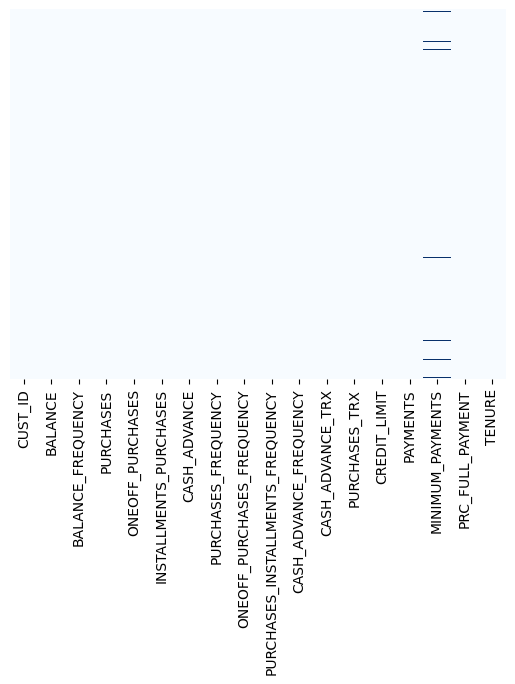

In [ ]:
# Visualize and explore data
sns.heatmap(credit_df.isnull(), yticklabels=False, cbar=False,cmap='Blues')

In [ ]:
credit_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
credit_df['MINIMUM_PAYMENTS'] = credit_df['MINIMUM_PAYMENTS'].fillna(credit_df['MINIMUM_PAYMENTS'].mean())

In [ ]:
credit_df.loc[(credit_df['CREDIT_LIMIT'].isnull()==True), 'CREDIT_LIMIT']=credit_df['CREDIT_LIMIT'].mean()

In [ ]:
credit_df.duplicated().sum()

0

In [ ]:
credit_df.drop('CUST_ID', axis=1, inplace=True)

In [ ]:
credit_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

<ipython-input-16-8f19faf161e8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_df[credit_df.columns[i]], kde_kws={'color':'b', 'lw':3, 'label':'KDE'}, hist_kws={'color':'g'})
<ipython-input-16-8f19faf161e8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_df[credit_df.columns[i]]

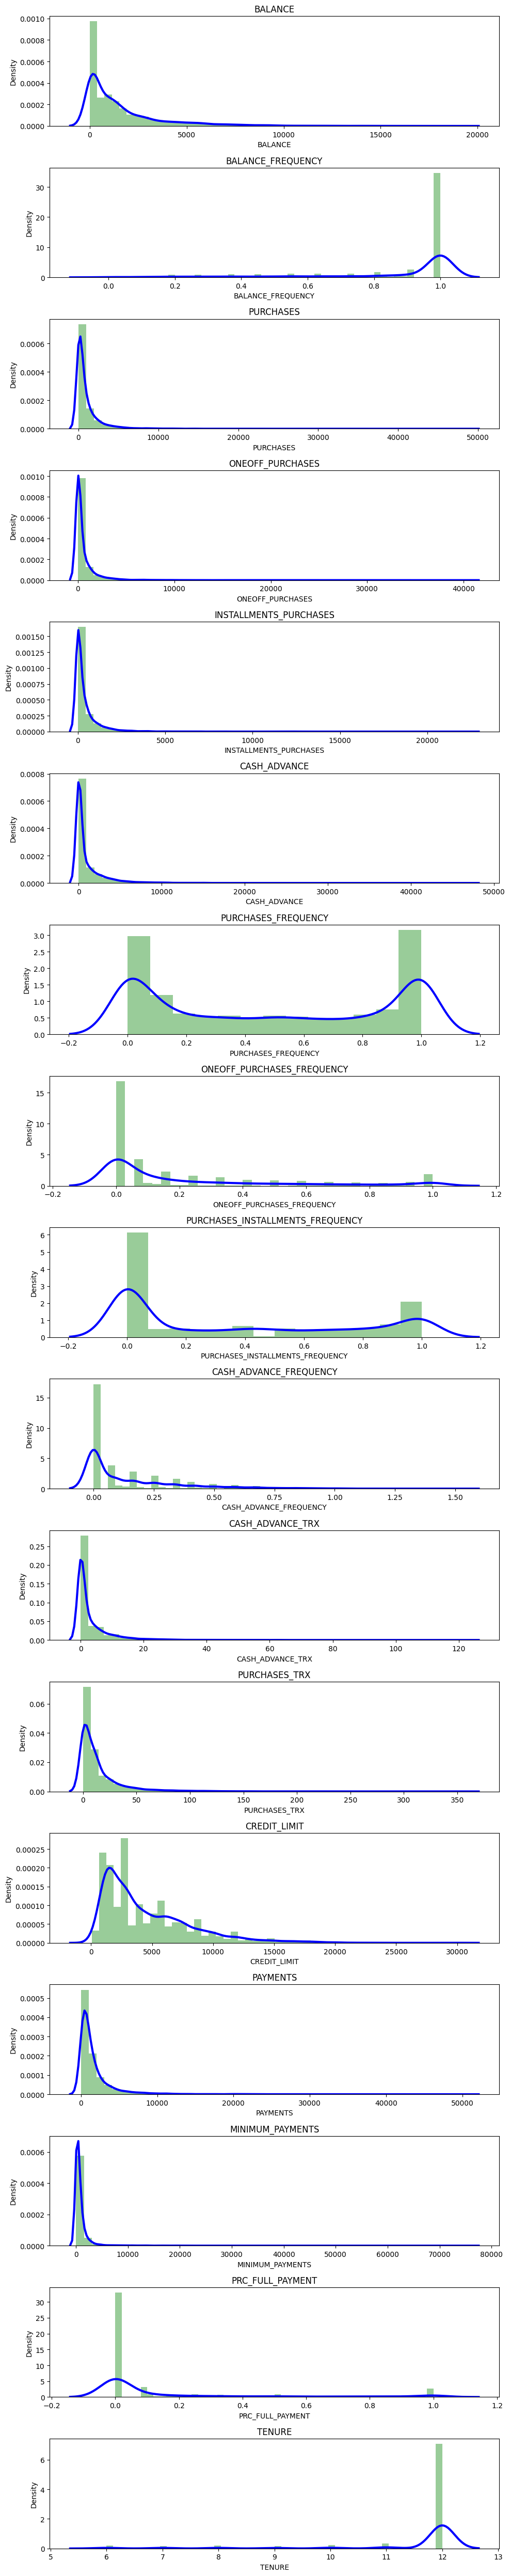

In [ ]:
plt.figure(figsize=(10,50))
for i in range(len(credit_df.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(credit_df[credit_df.columns[i]], kde_kws={'color':'b', 'lw':3, 'label':'KDE'}, hist_kws={'color':'g'})
    plt.title(credit_df.columns[i])

plt.tight_layout()

<Axes: >

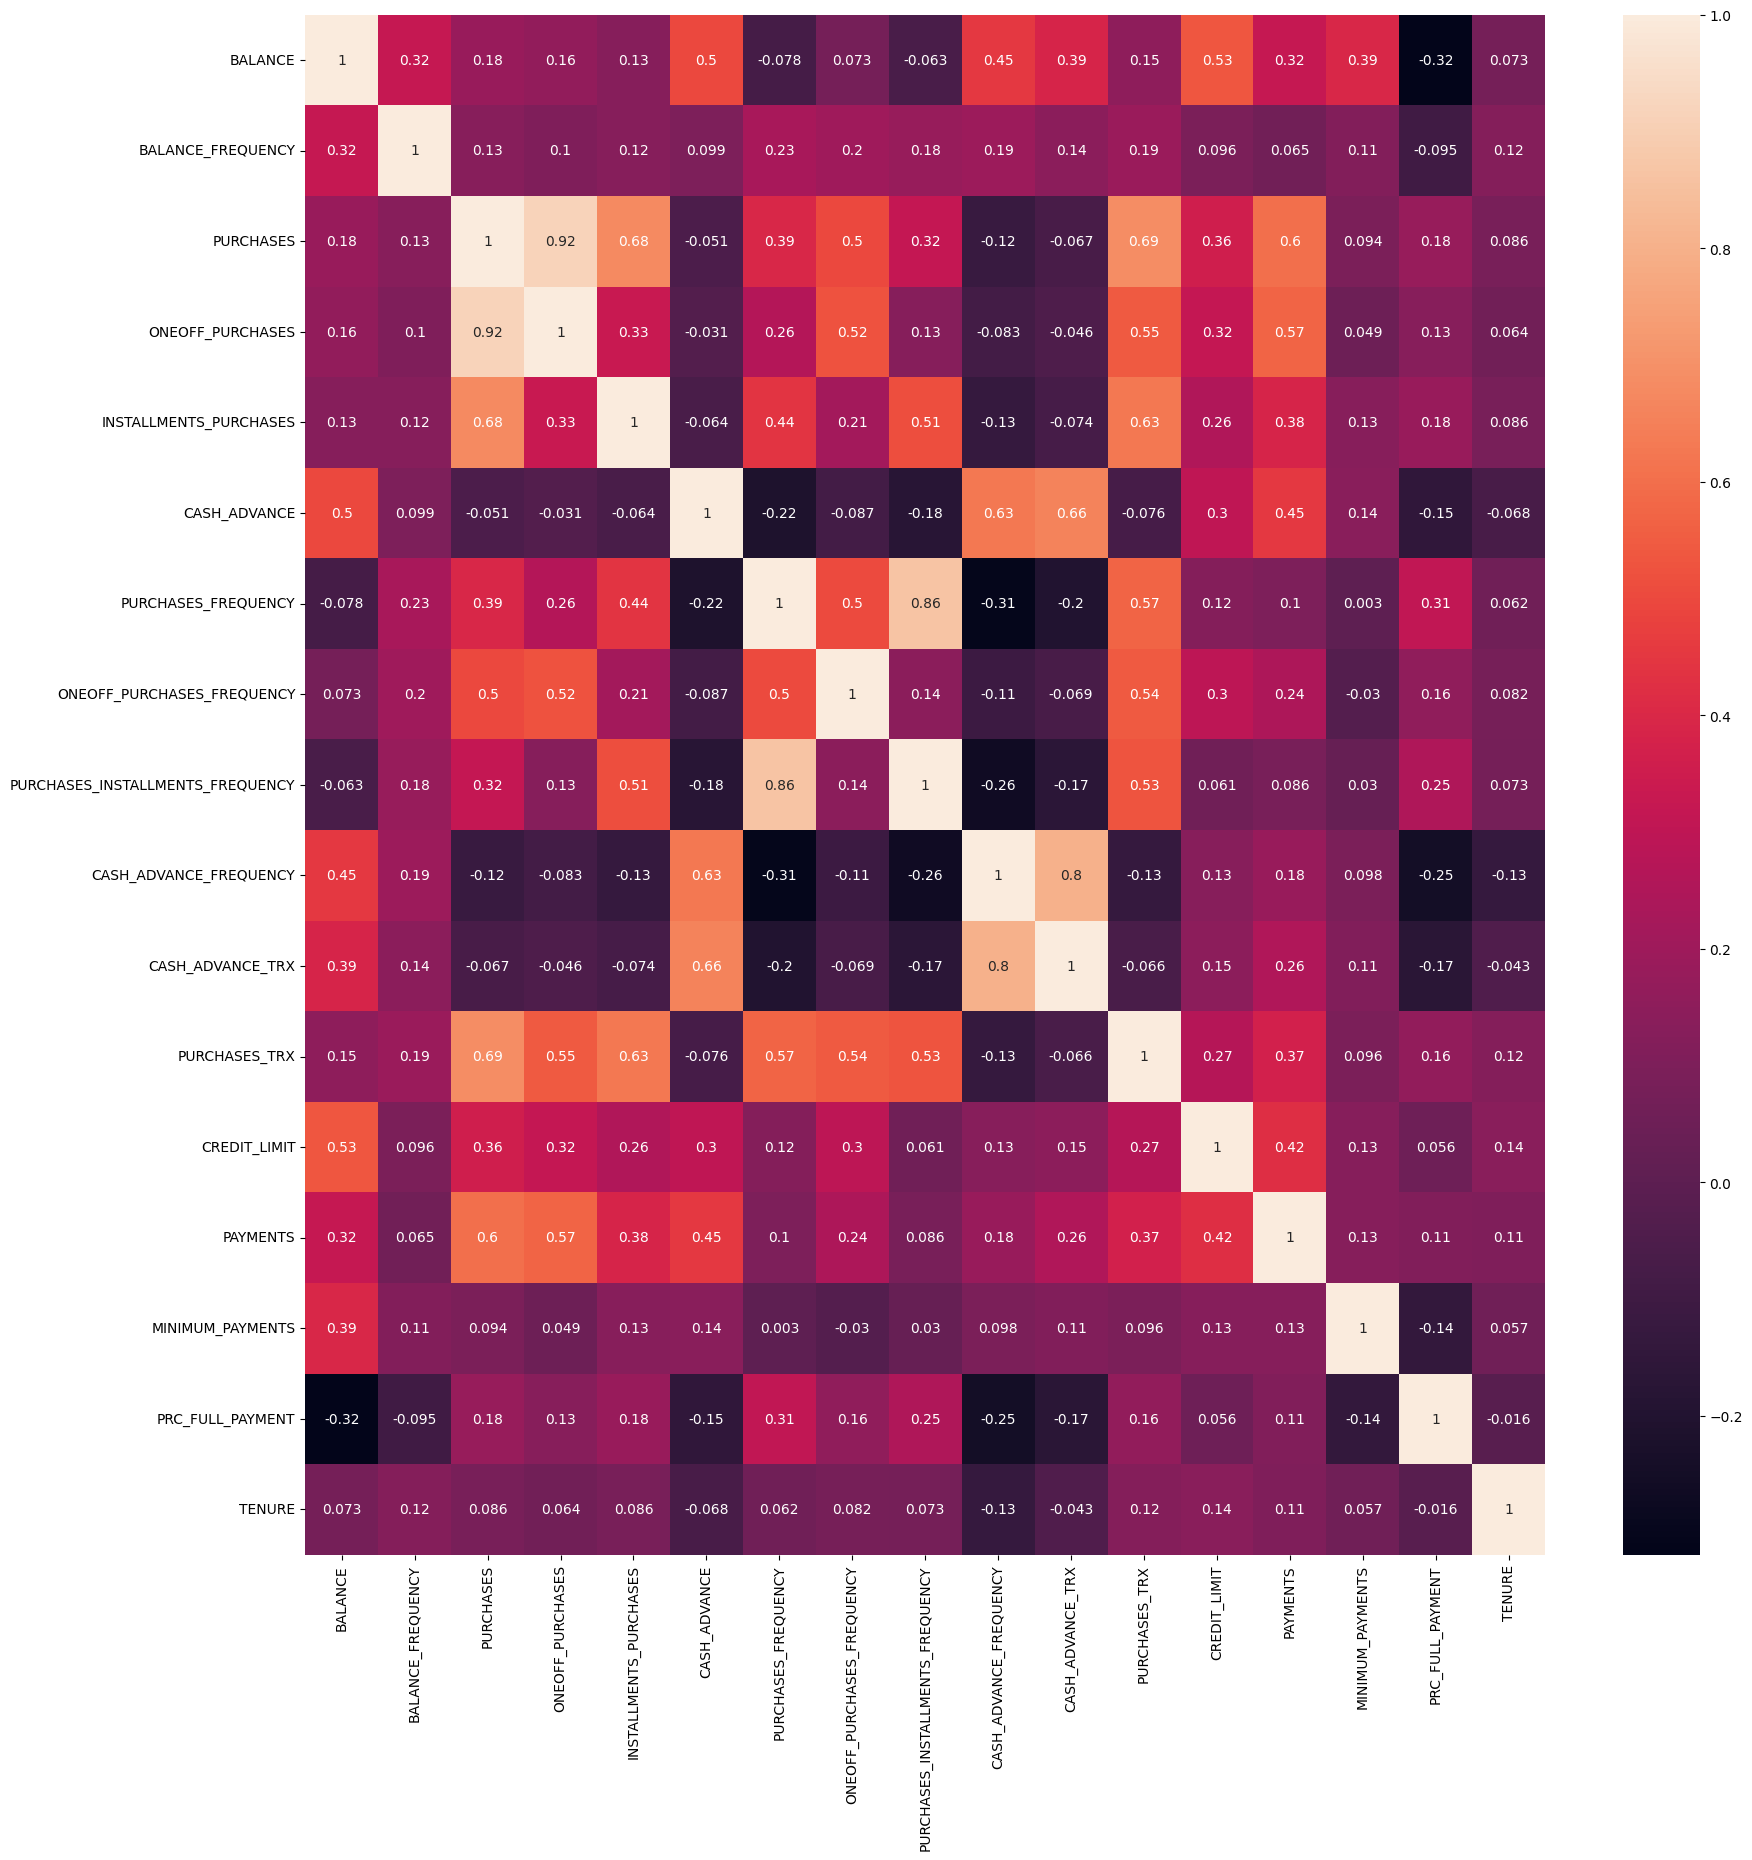

In [ ]:
f, ax = plt.subplots(figsize=(20,20))
correlations = credit_df.corr()
sns.heatmap(correlations, annot=True)

In [ ]:
# Finding the optimum number of clusters(Elbow)
# in kmeans clustering inertia_ represents the WCSS value
scaler = StandardScaler()
credit_df_scaled= scaler.fit_transform(credit_df)

In [ ]:
score_1=[]
range_values = range(1,20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_transform(credit_df_scaled)
    score_1.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
score_1

[152149.99999999983,
 127785.02078035074,
 111986.6301244729,
 99074.38579876853,
 91502.4802895125,
 84852.47540636097,
 79528.0473026001,
 74491.22104984269,
 71097.25034934876,
 66462.19418501822,
 63673.33566331397,
 61369.62762564091,
 59149.128528299276,
 57486.98845435219,
 55865.0356638244,
 54595.80148899863,
 53338.40635501592,
 51952.70092001589,
 50949.73208902318]

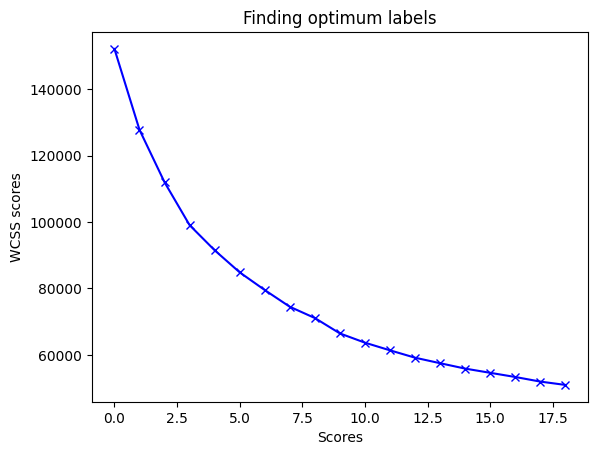

In [ ]:
plt.plot(score_1, 'bx-')
plt.title('Finding optimum labels')
plt.xlabel('Scores')
plt.ylabel('WCSS scores')
plt.show()

In [ ]:
# From the above we can say that 7-8 clusters are optimum

# Applying KMeans
kmeans = KMeans(n_clusters=8)
kmeans.fit(credit_df_scaled)
labels= kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.cluster_centers_.shape

(8, 17)

In [ ]:
cluster_centres = pd.DataFrame(data=kmeans.cluster_centers_, columns=[credit_df.columns])
cluster_centres

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.671554,0.390965,-0.220860,-0.157055,-0.233748,1.994510,-0.481496,-0.211898,-0.421828,1.909575,1.914640,-0.270219,1.013879,0.811164,0.547173,-0.391667,0.072107
1,0.007283,0.404203,-0.354191,-0.238906,-0.398458,-0.099919,-0.840969,-0.383085,-0.750801,0.093449,-0.035668,-0.477640,-0.306684,-0.251950,-0.013148,-0.454814,0.273785
2,-0.121858,0.403109,0.564973,0.684705,0.077745,-0.332601,0.998872,1.914235,0.215262,-0.418727,-0.333855,0.659581,0.465822,0.163076,-0.156076,0.460105,0.274536
3,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
4,-0.700920,-2.137968,-0.309826,-0.234398,-0.301835,-0.322516,-0.553044,-0.440776,-0.438526,-0.521496,-0.376524,-0.418173,-0.174436,-0.201957,-0.256749,0.284044,0.200511
5,-0.357965,0.332433,-0.029606,-0.240593,0.371813,-0.362520,0.997057,-0.380677,1.208315,-0.471903,-0.359553,0.195249,-0.259534,-0.213084,-0.029779,0.313067,0.255413
6,-0.334235,-0.345364,-0.287007,-0.212744,-0.287412,0.068171,-0.202320,-0.283605,-0.226363,0.308382,0.000348,-0.387485,-0.562891,-0.391355,-0.209255,0.013610,-3.198580
7,1.086172,0.472614,2.606207,1.903728,2.664995,-0.126617,1.163761,1.584646,1.260021,-0.269145,-0.128824,3.218719,1.337649,1.532138,0.601452,0.259664,0.335772


In [ ]:
# Inverse transformation for understanding the above numbers
cluster_centres = scaler.inverse_transform(cluster_centres)
cluster_centres = pd.DataFrame(data = cluster_centres, columns=[credit_df.columns])

labels.max()

7

In [ ]:
cluster_centres.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5043.673813,0.969887,531.334700,331.757486,199.692356,5161.451433,0.297103,0.139244,0.196792,0.517270,16.314836,7.993205,8183.357356,4081.385540,2139.369978,0.039159,11.613817
1,1579.634093,0.973023,246.471156,195.902503,50.747375,769.335488,0.152829,0.088176,0.066050,0.153844,3.005417,2.837486,3378.608403,1003.773299,833.565951,0.020689,11.883713
2,1310.838700,0.972764,2210.278758,1728.907721,481.371037,281.391112,0.891246,0.773511,0.449988,0.051353,0.970509,31.104558,6189.300512,2205.232650,500.477164,0.288287,11.884718
3,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
4,105.569273,0.370806,341.256608,203.384962,138.122110,302.539864,0.268387,0.070966,0.190156,0.030788,0.679325,4.315612,3859.780122,1148.499350,265.862801,0.236793,11.785654


In [ ]:
credit_df_clusters = pd.concat([credit_df, pd.DataFrame({'clusters': labels})], axis=1)
credit_df_clusters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,6


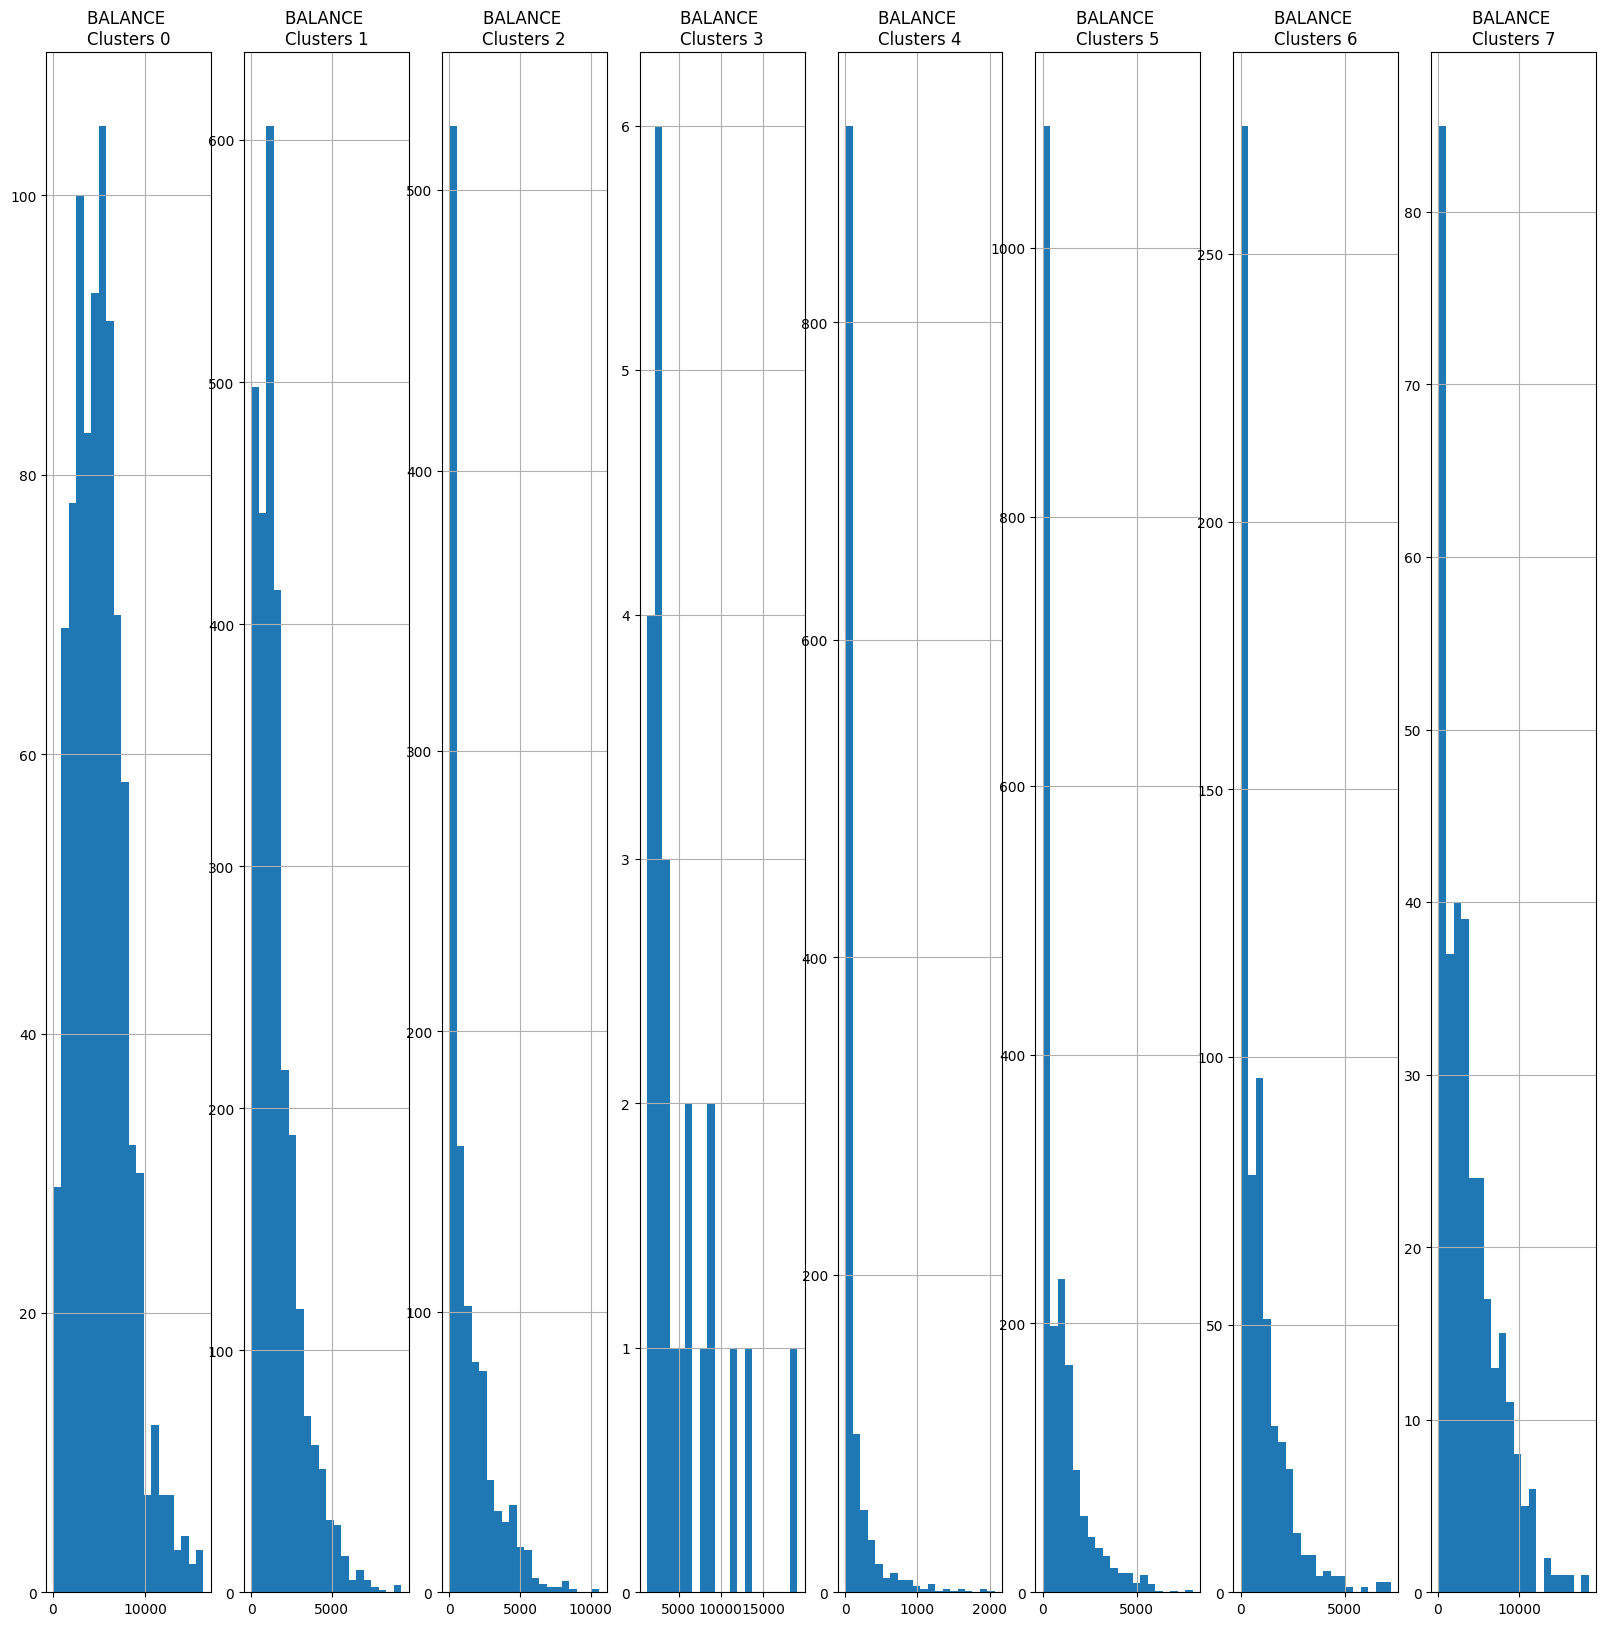

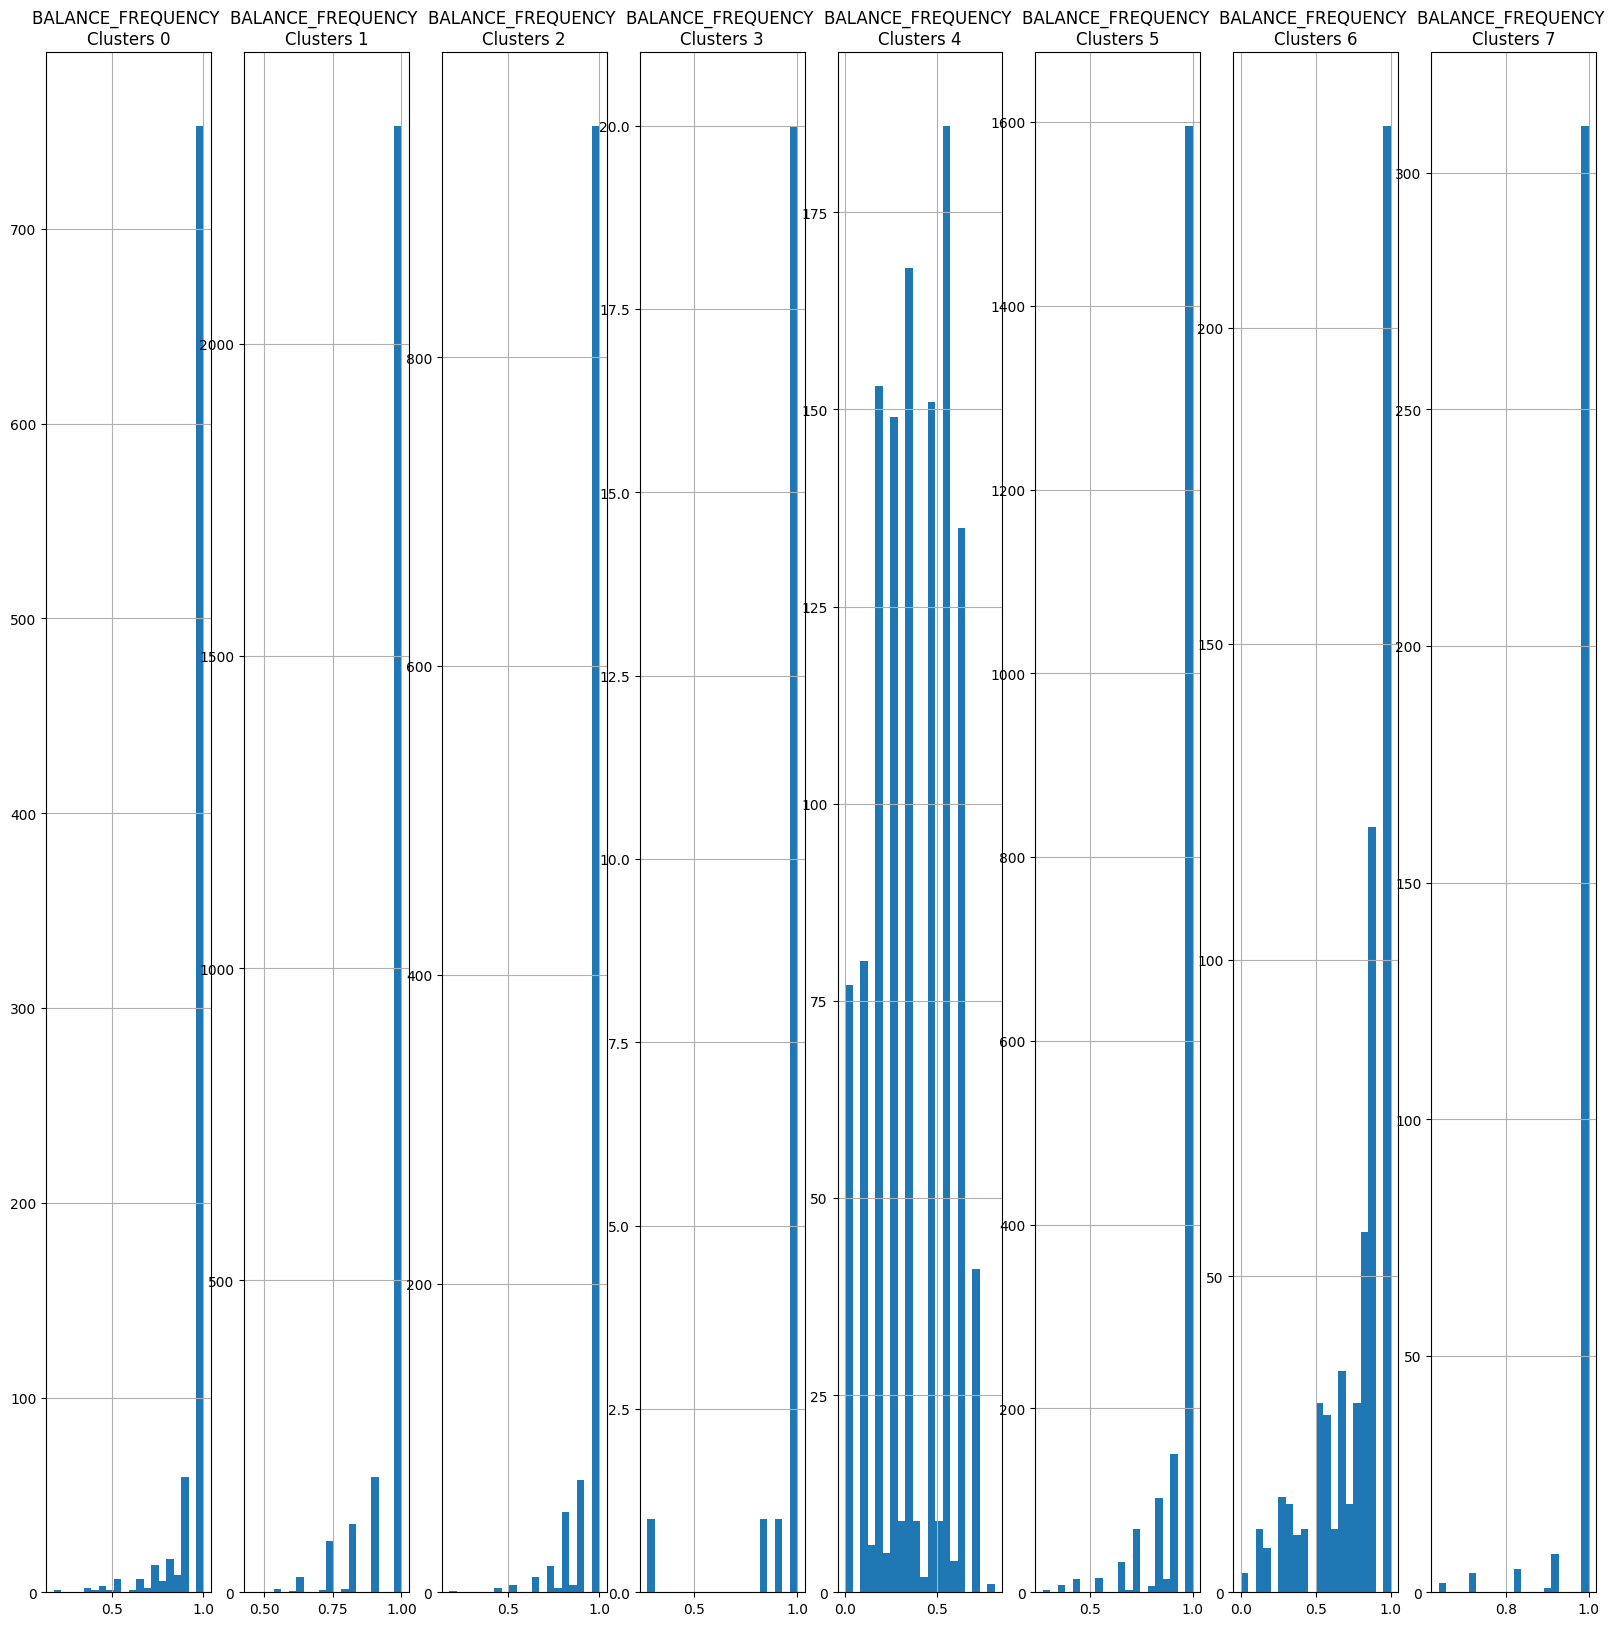

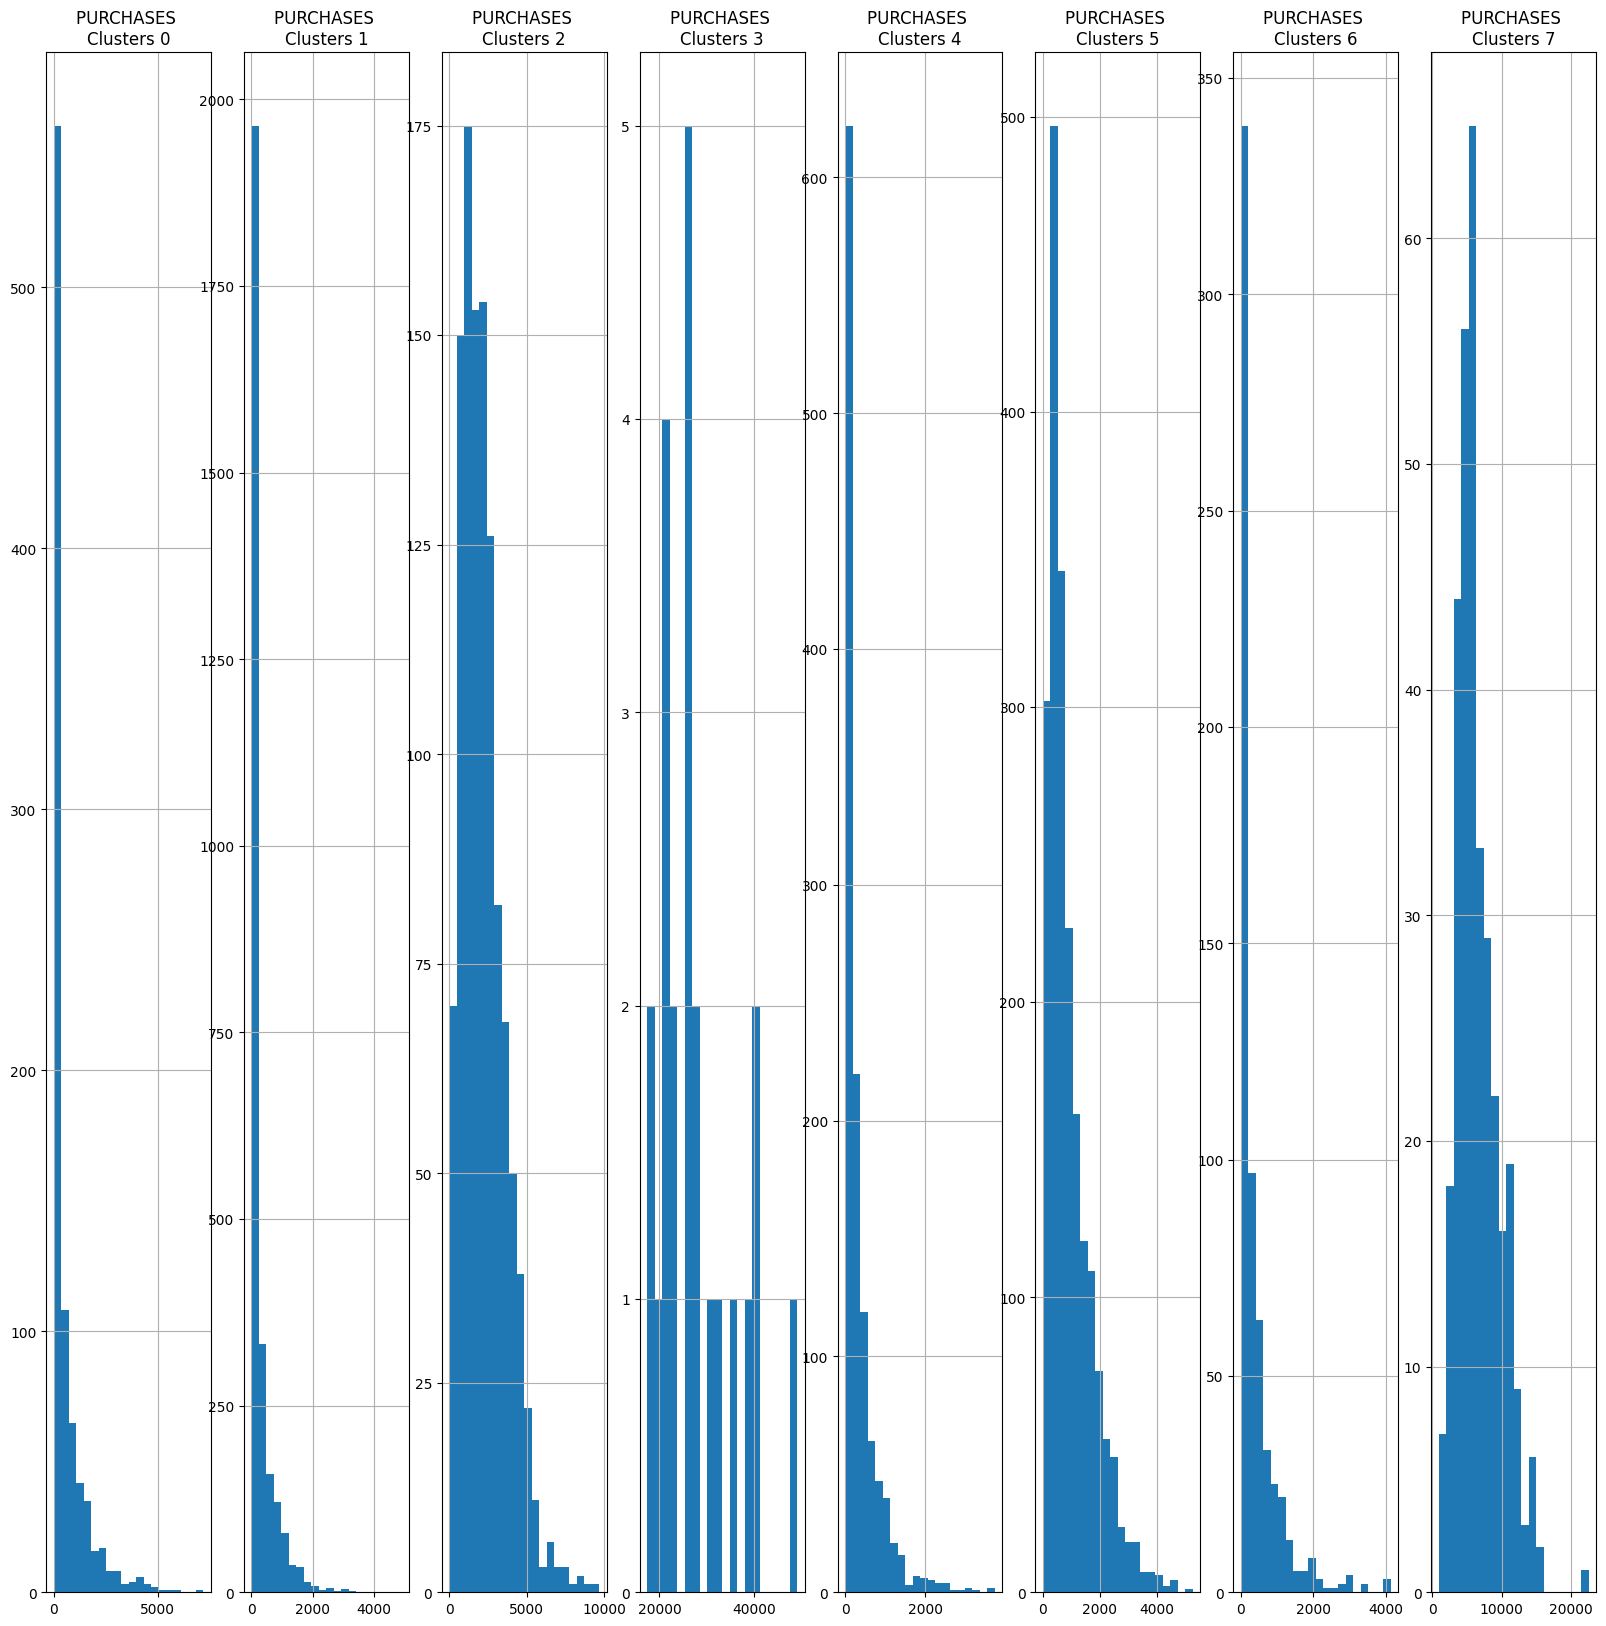

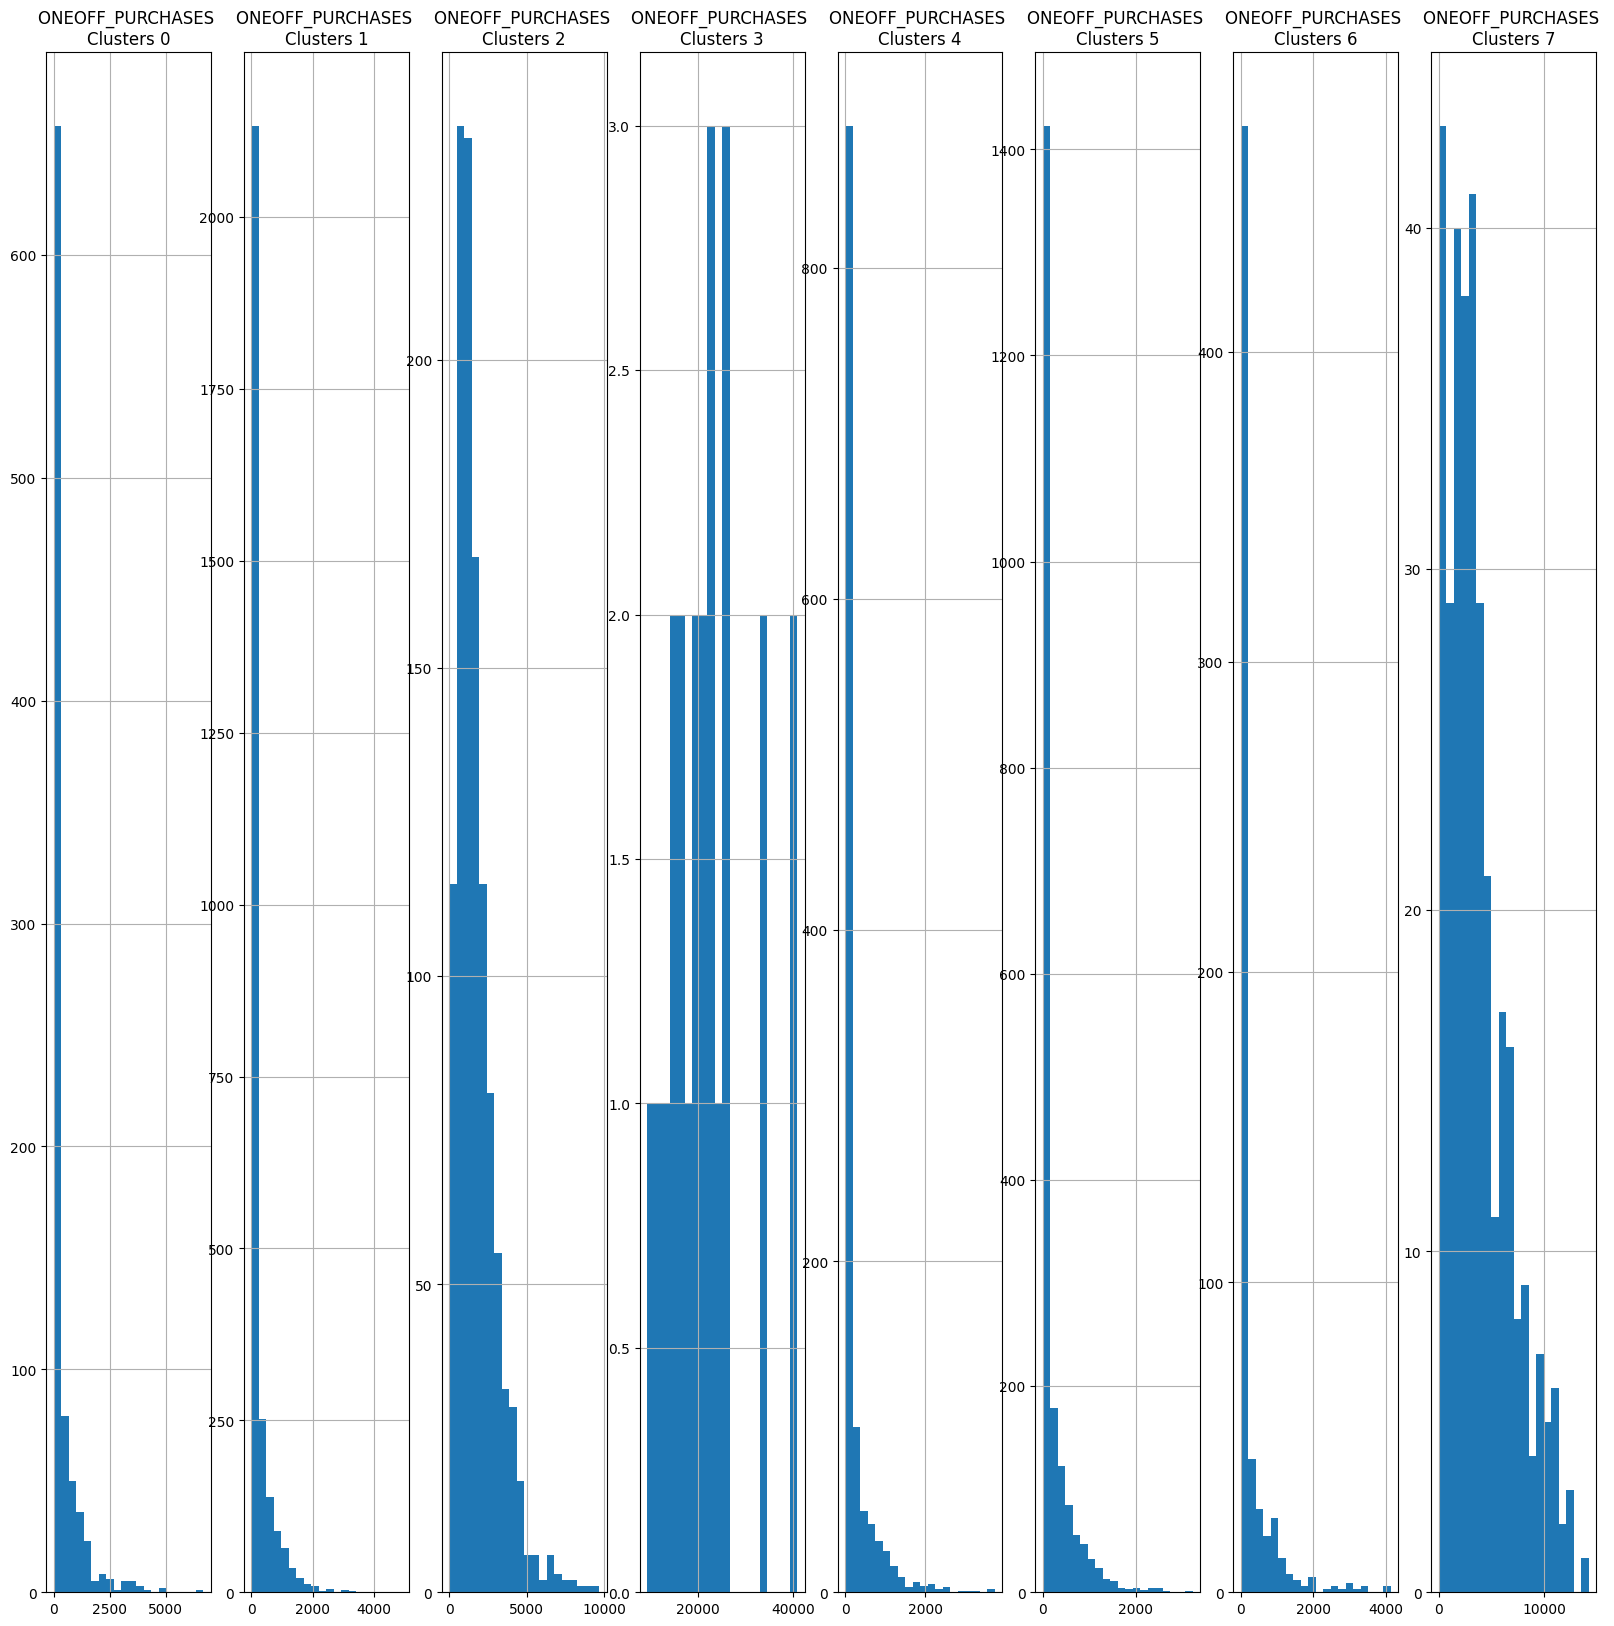

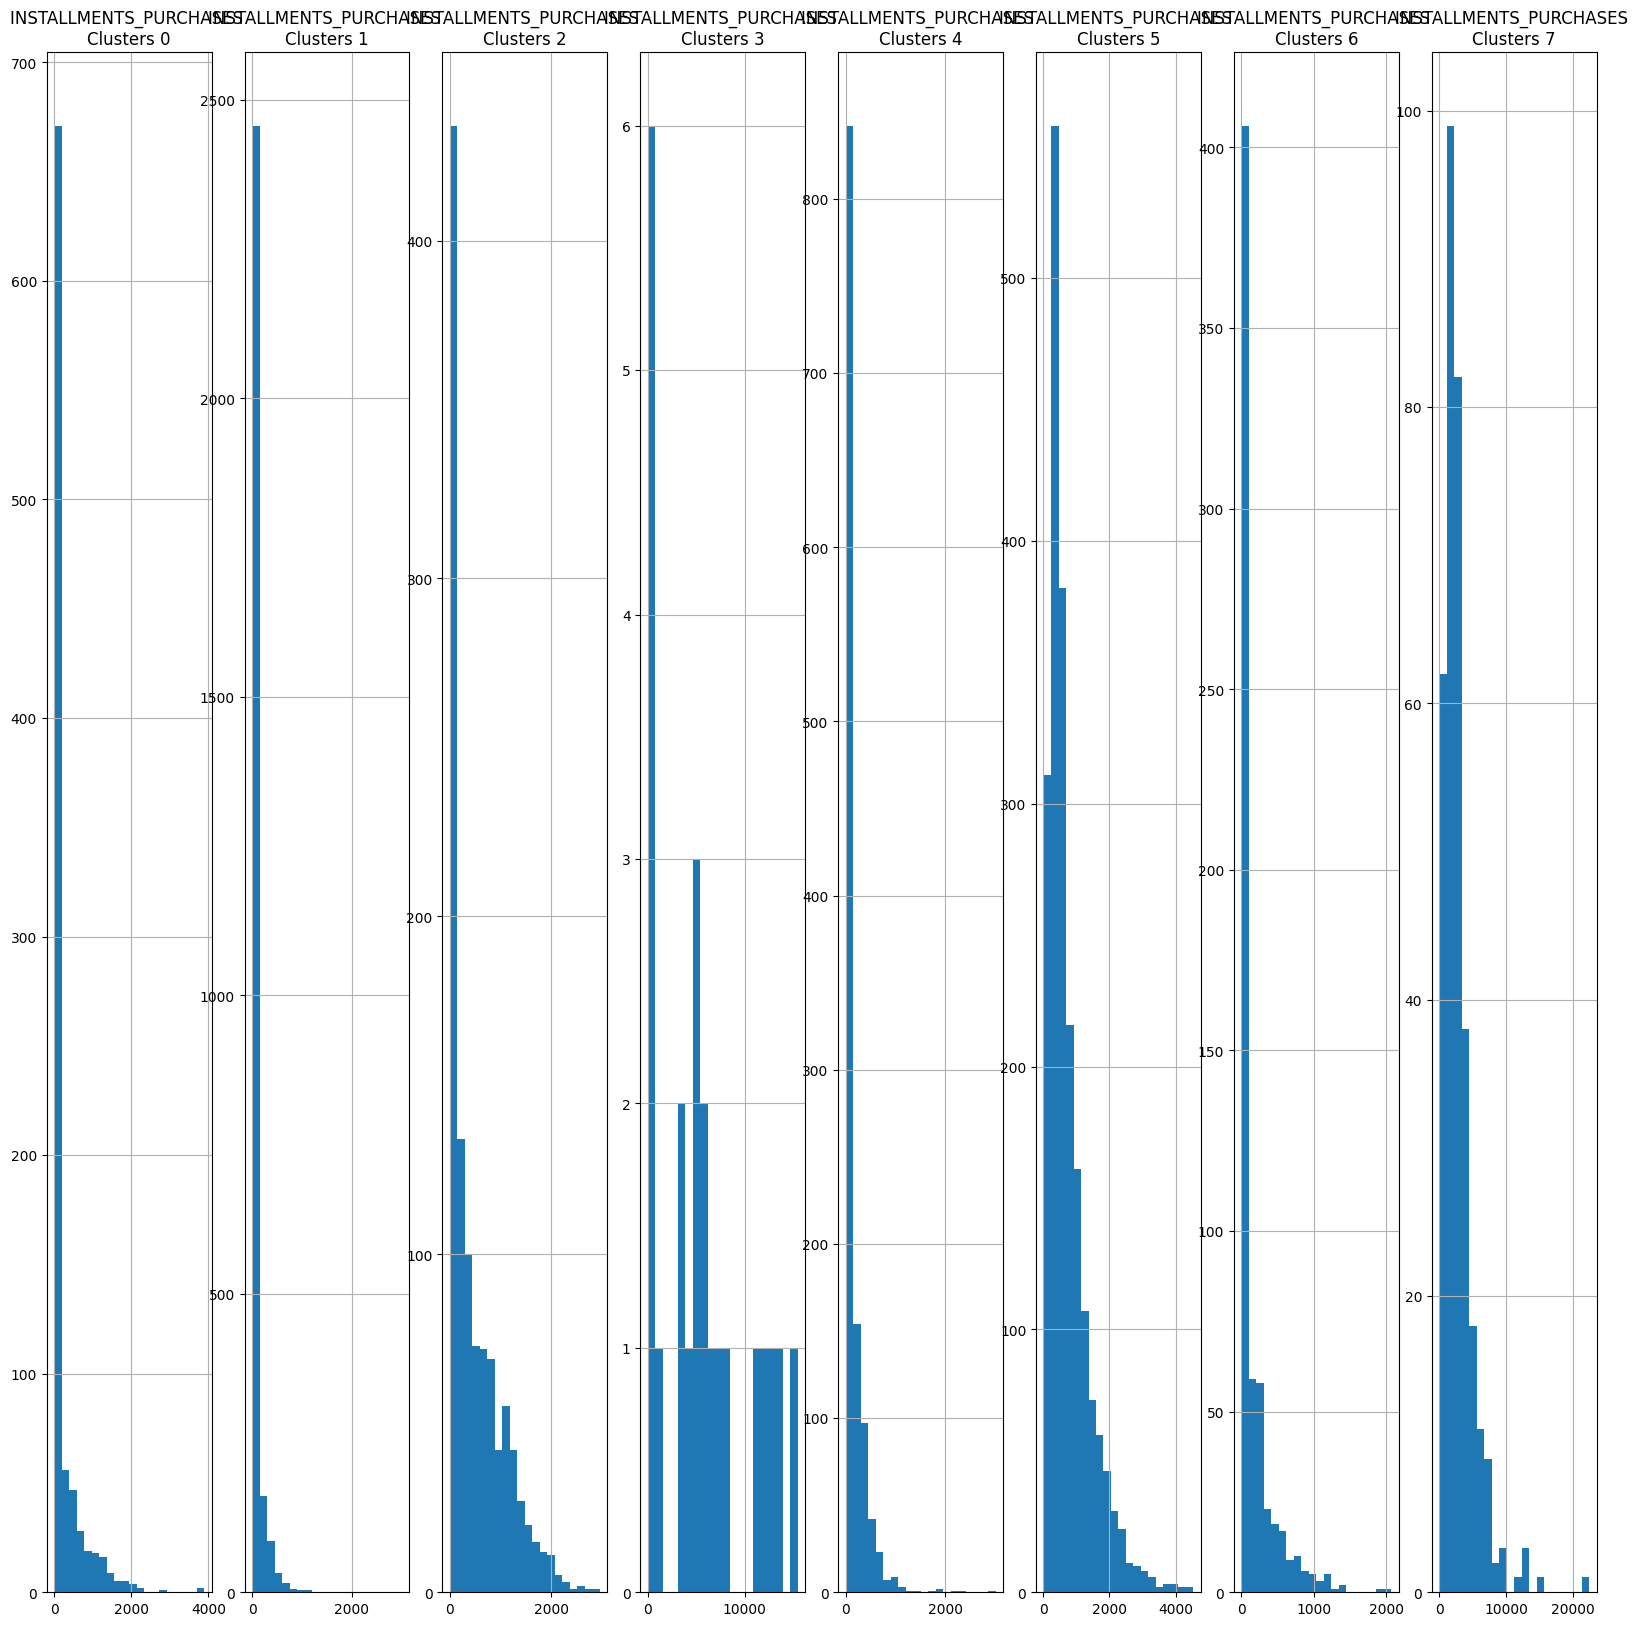

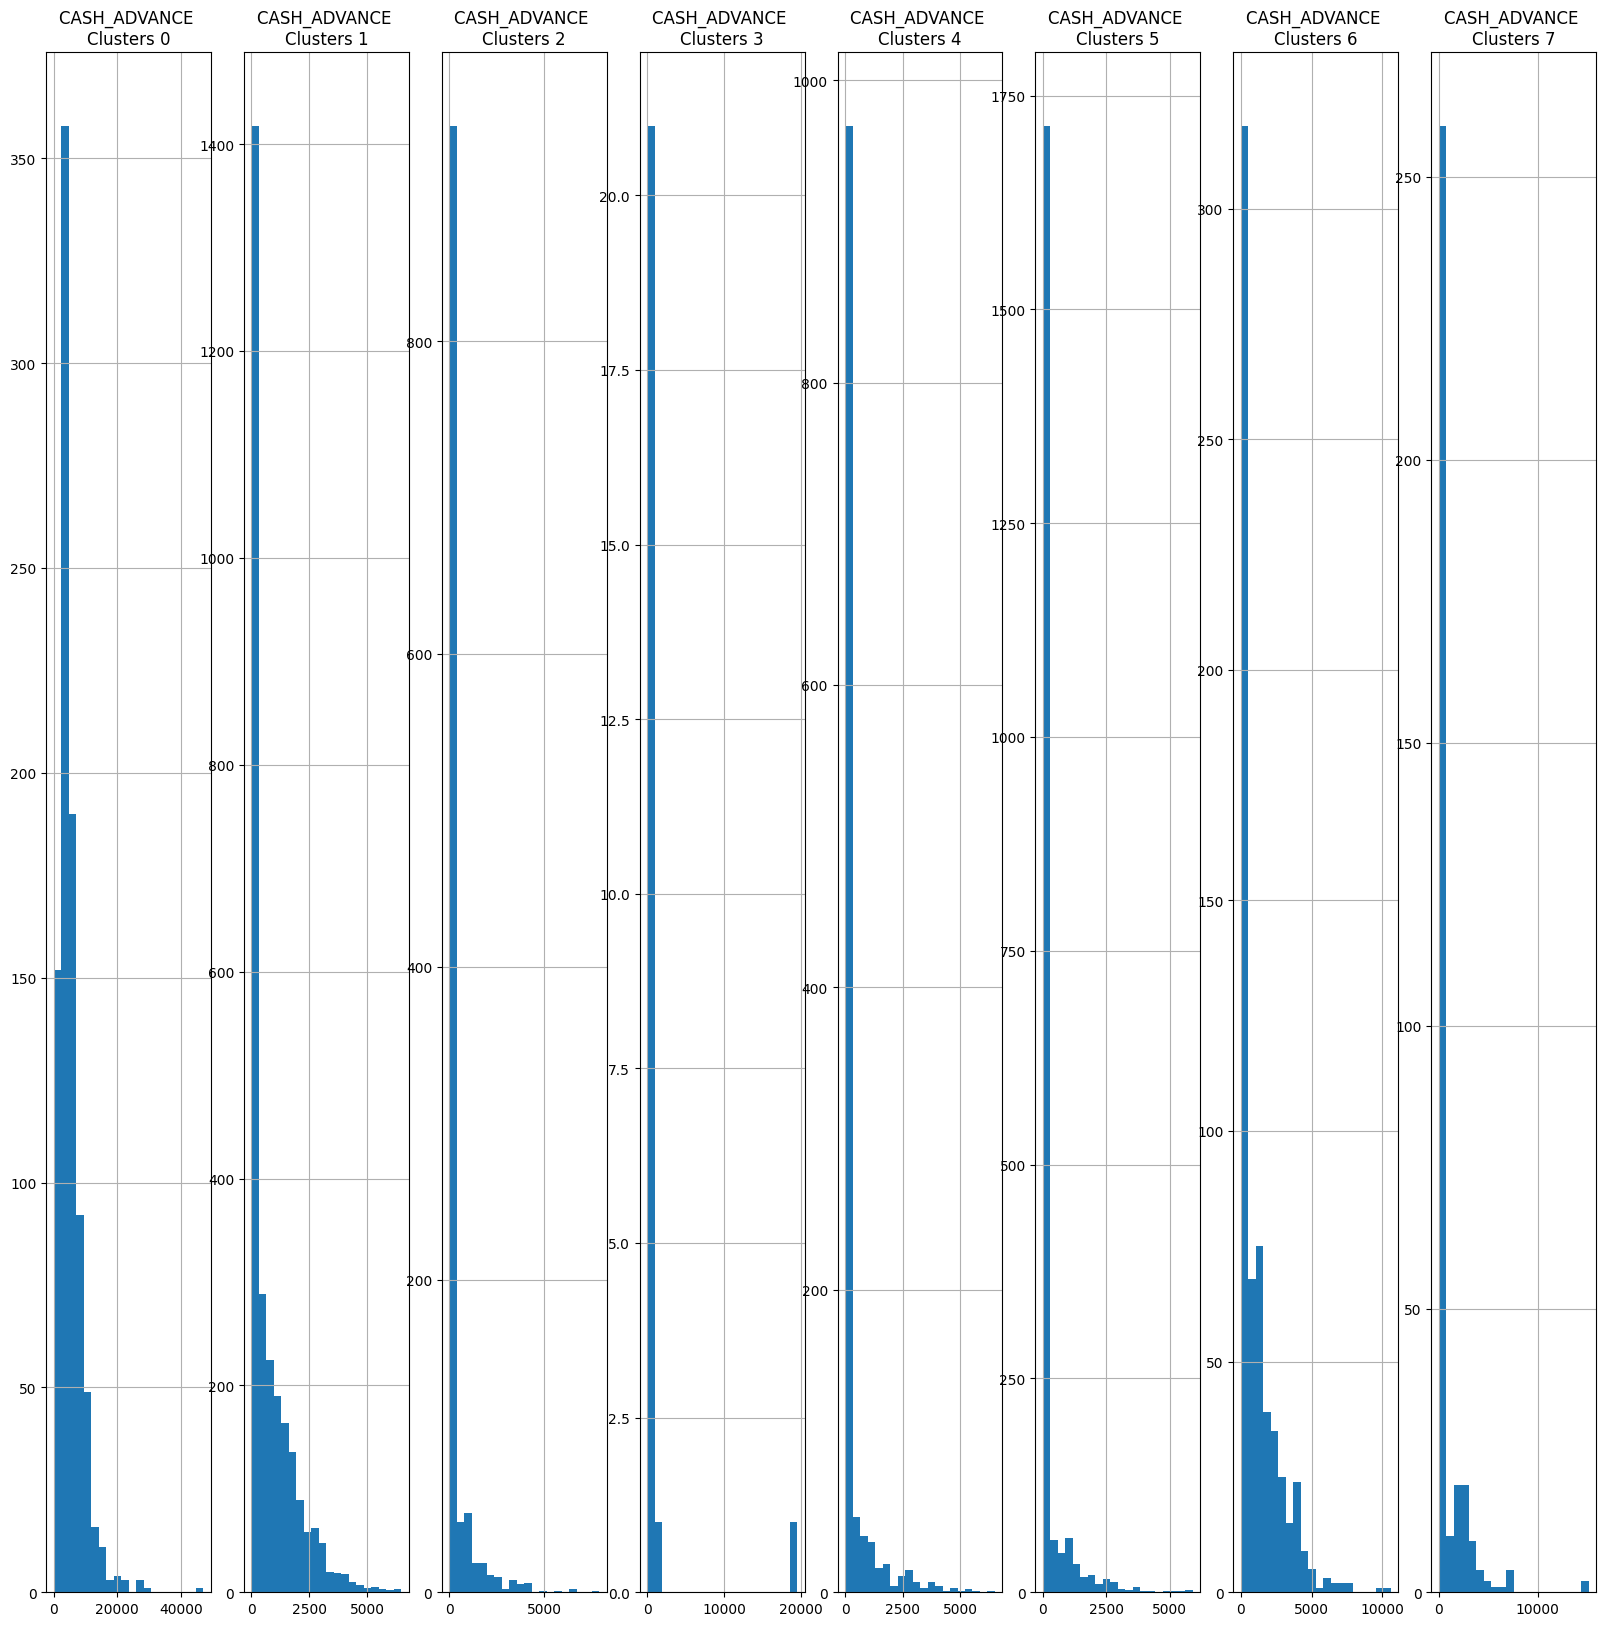

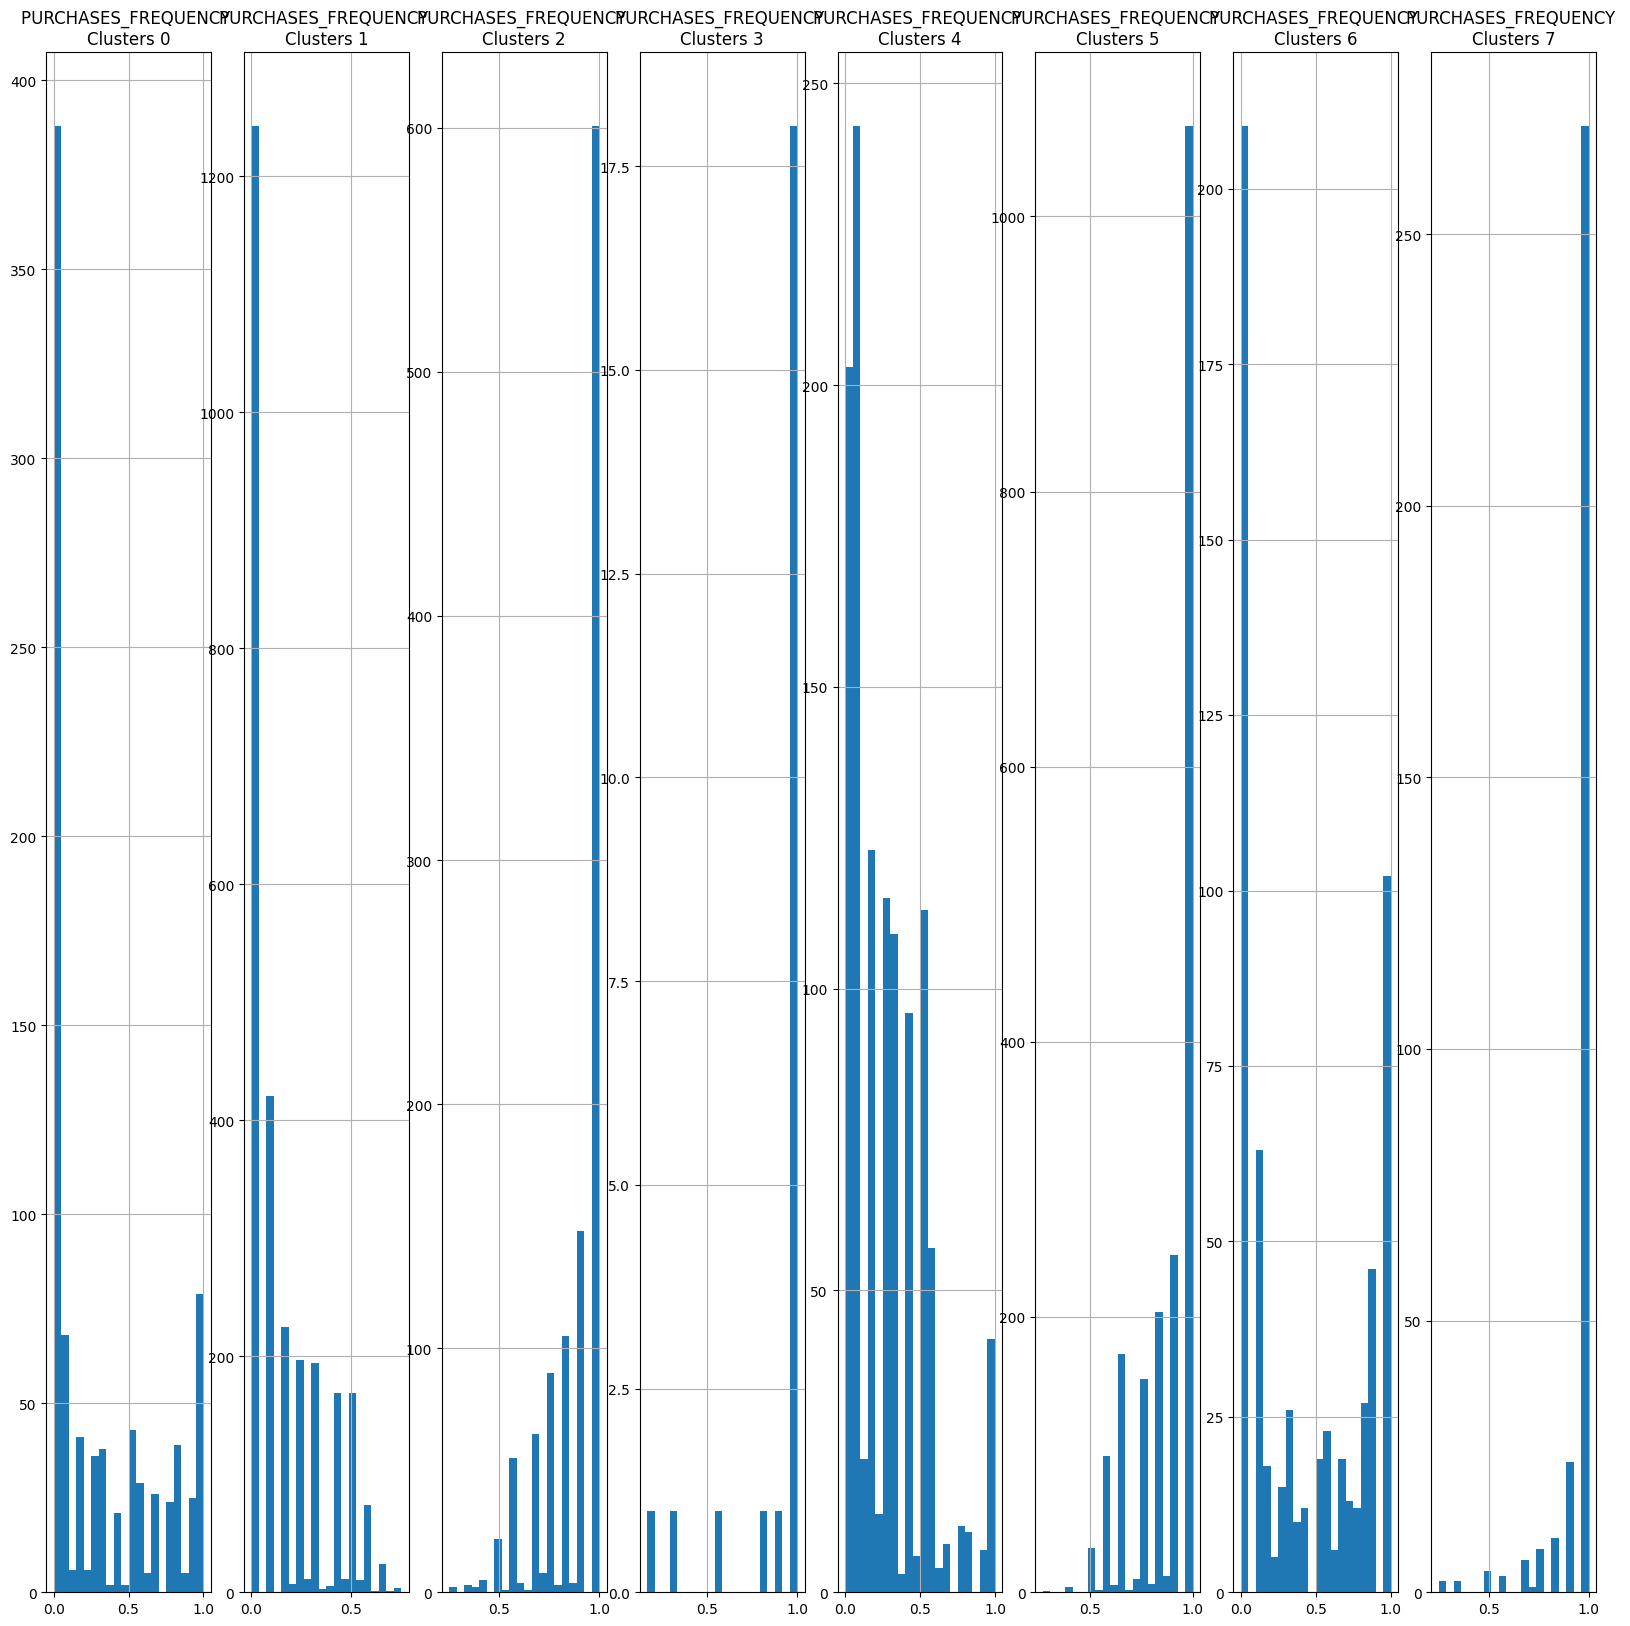

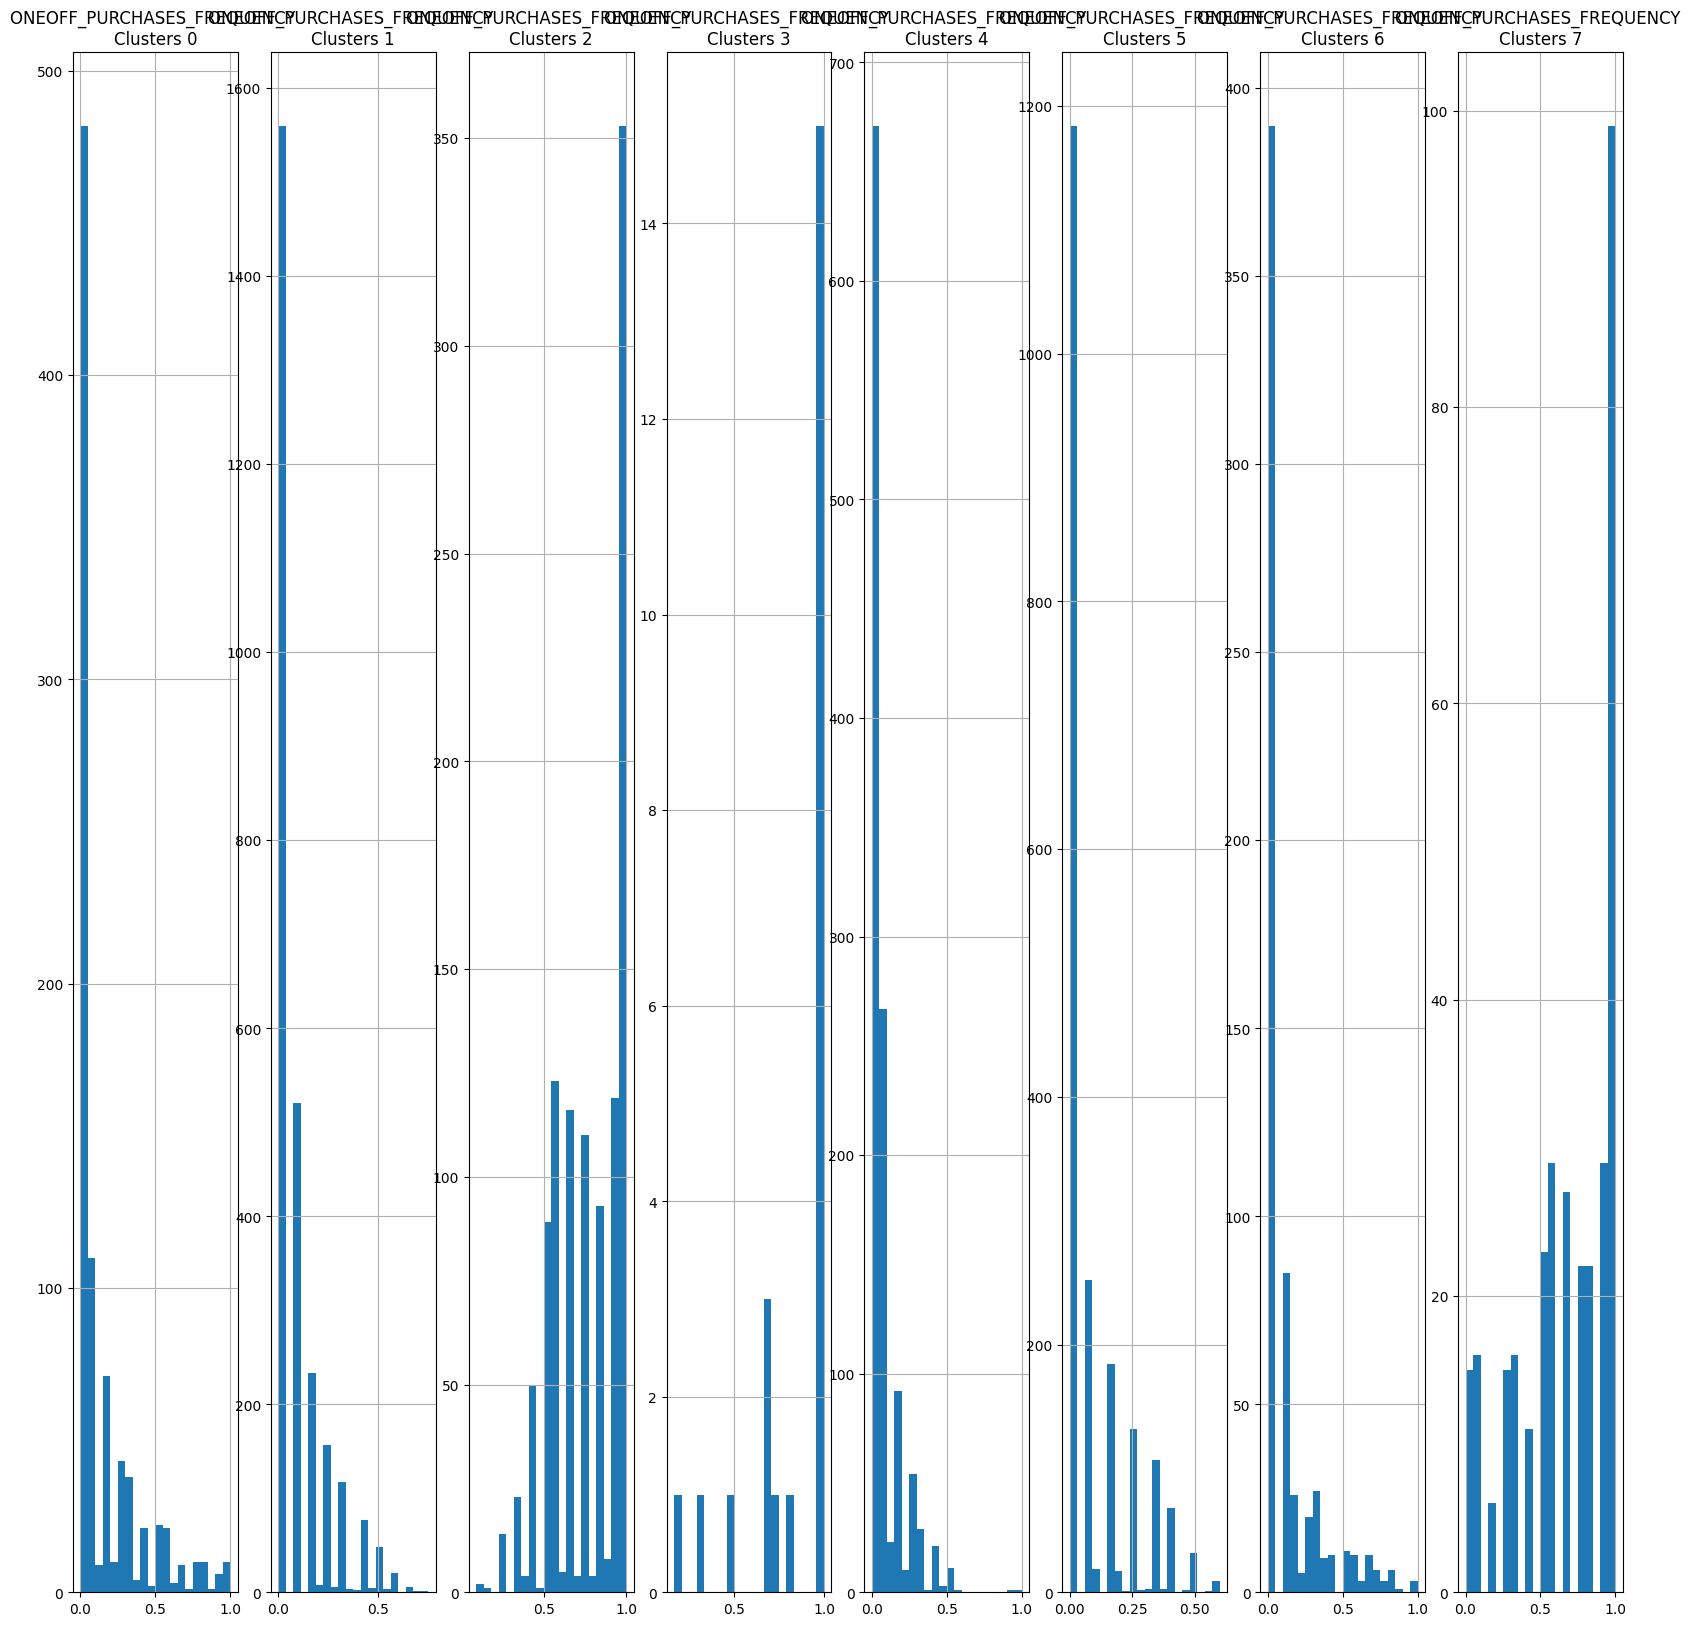

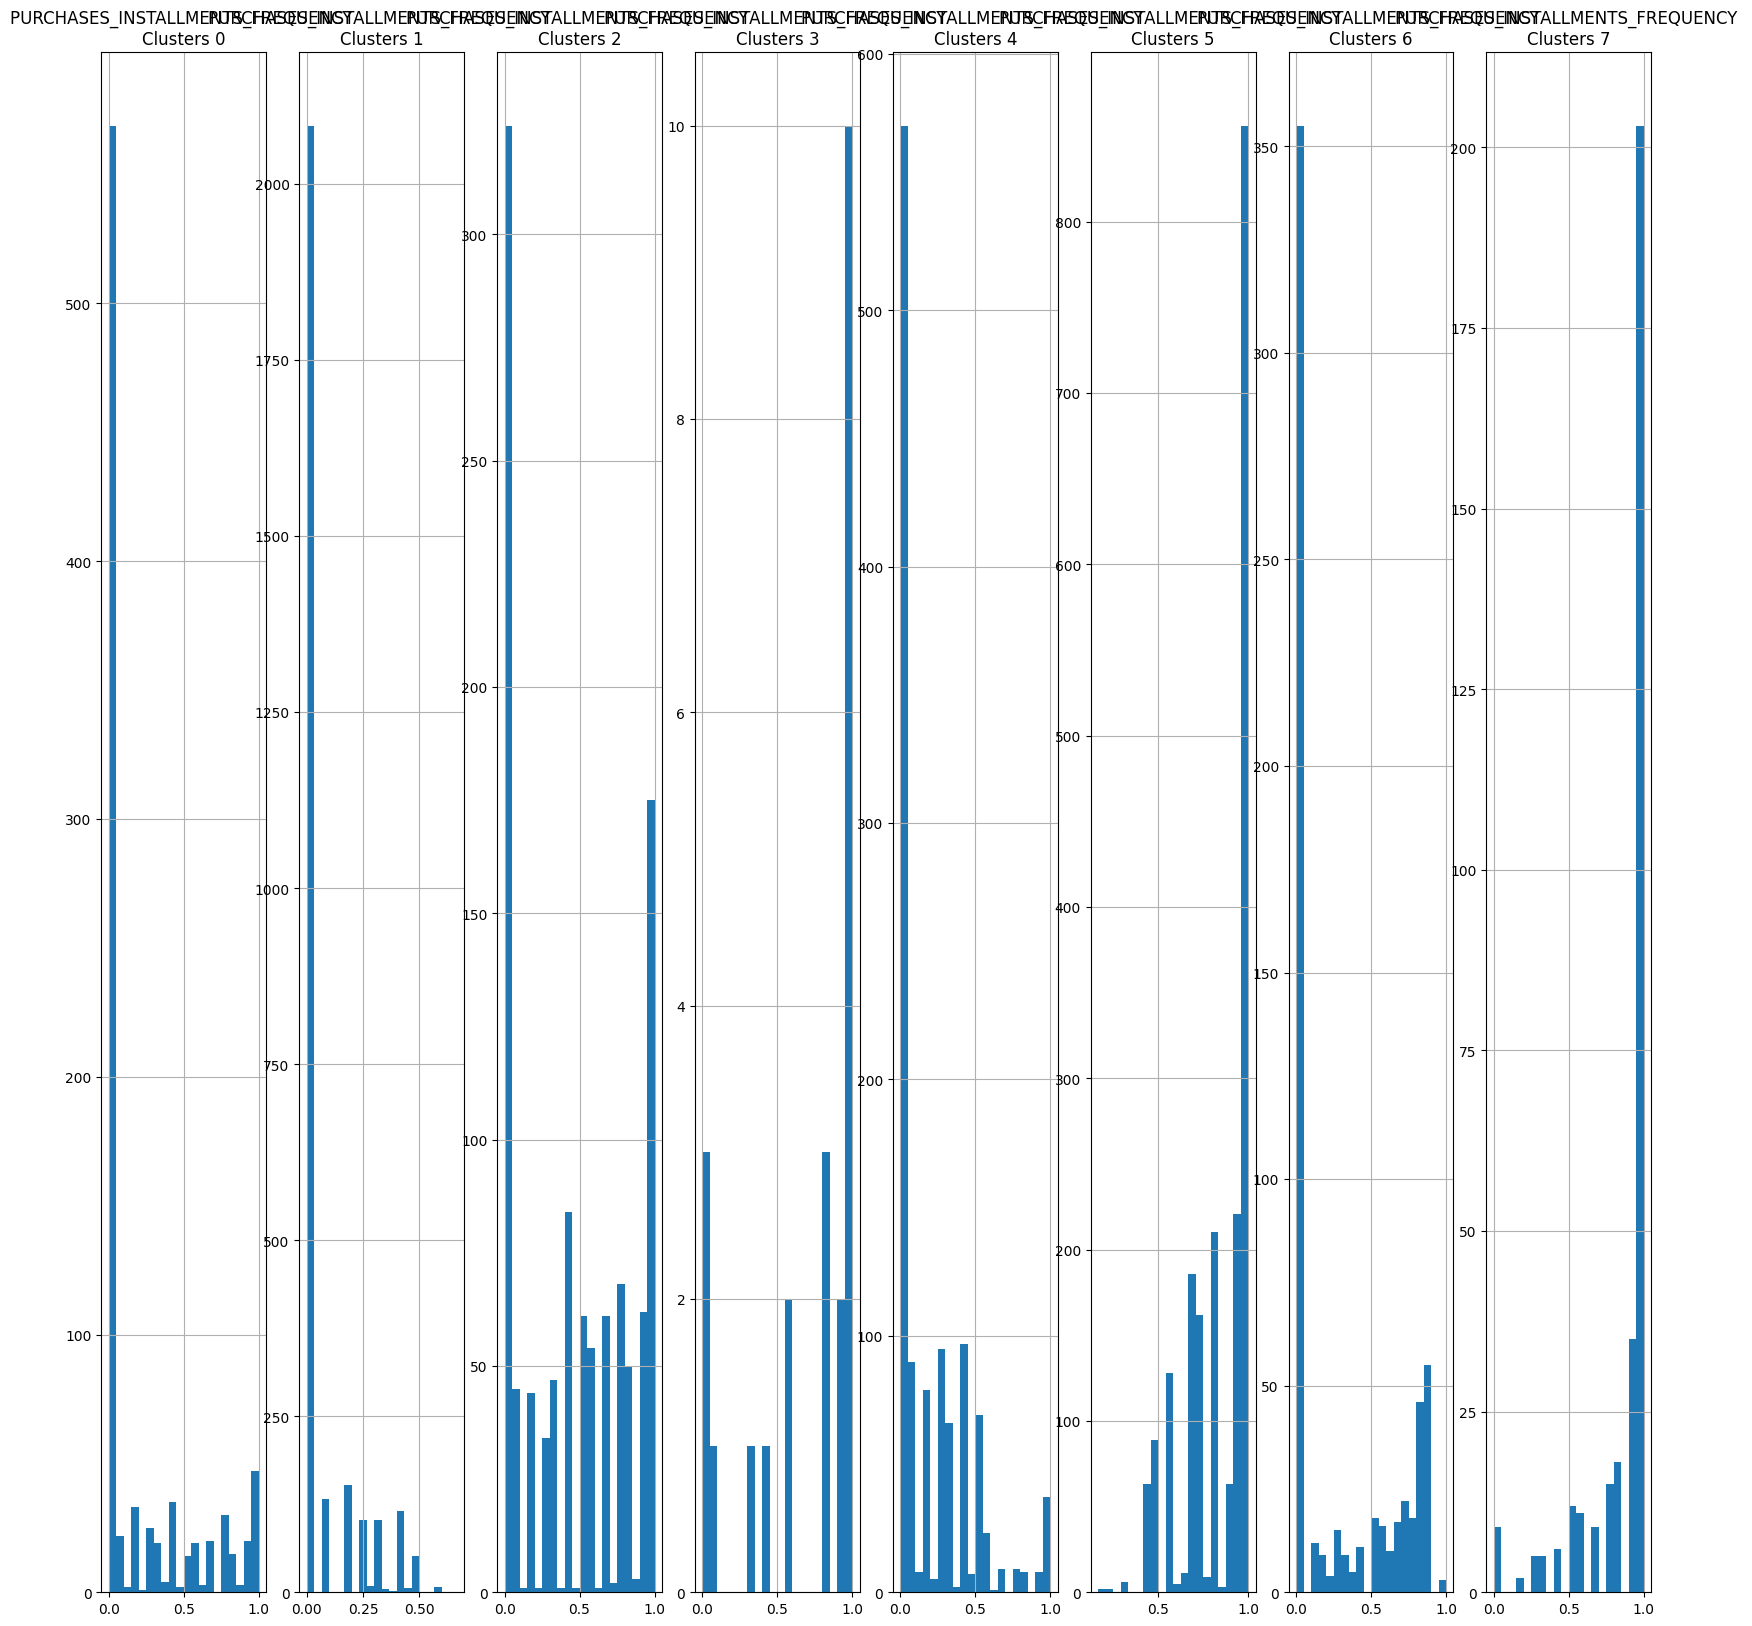

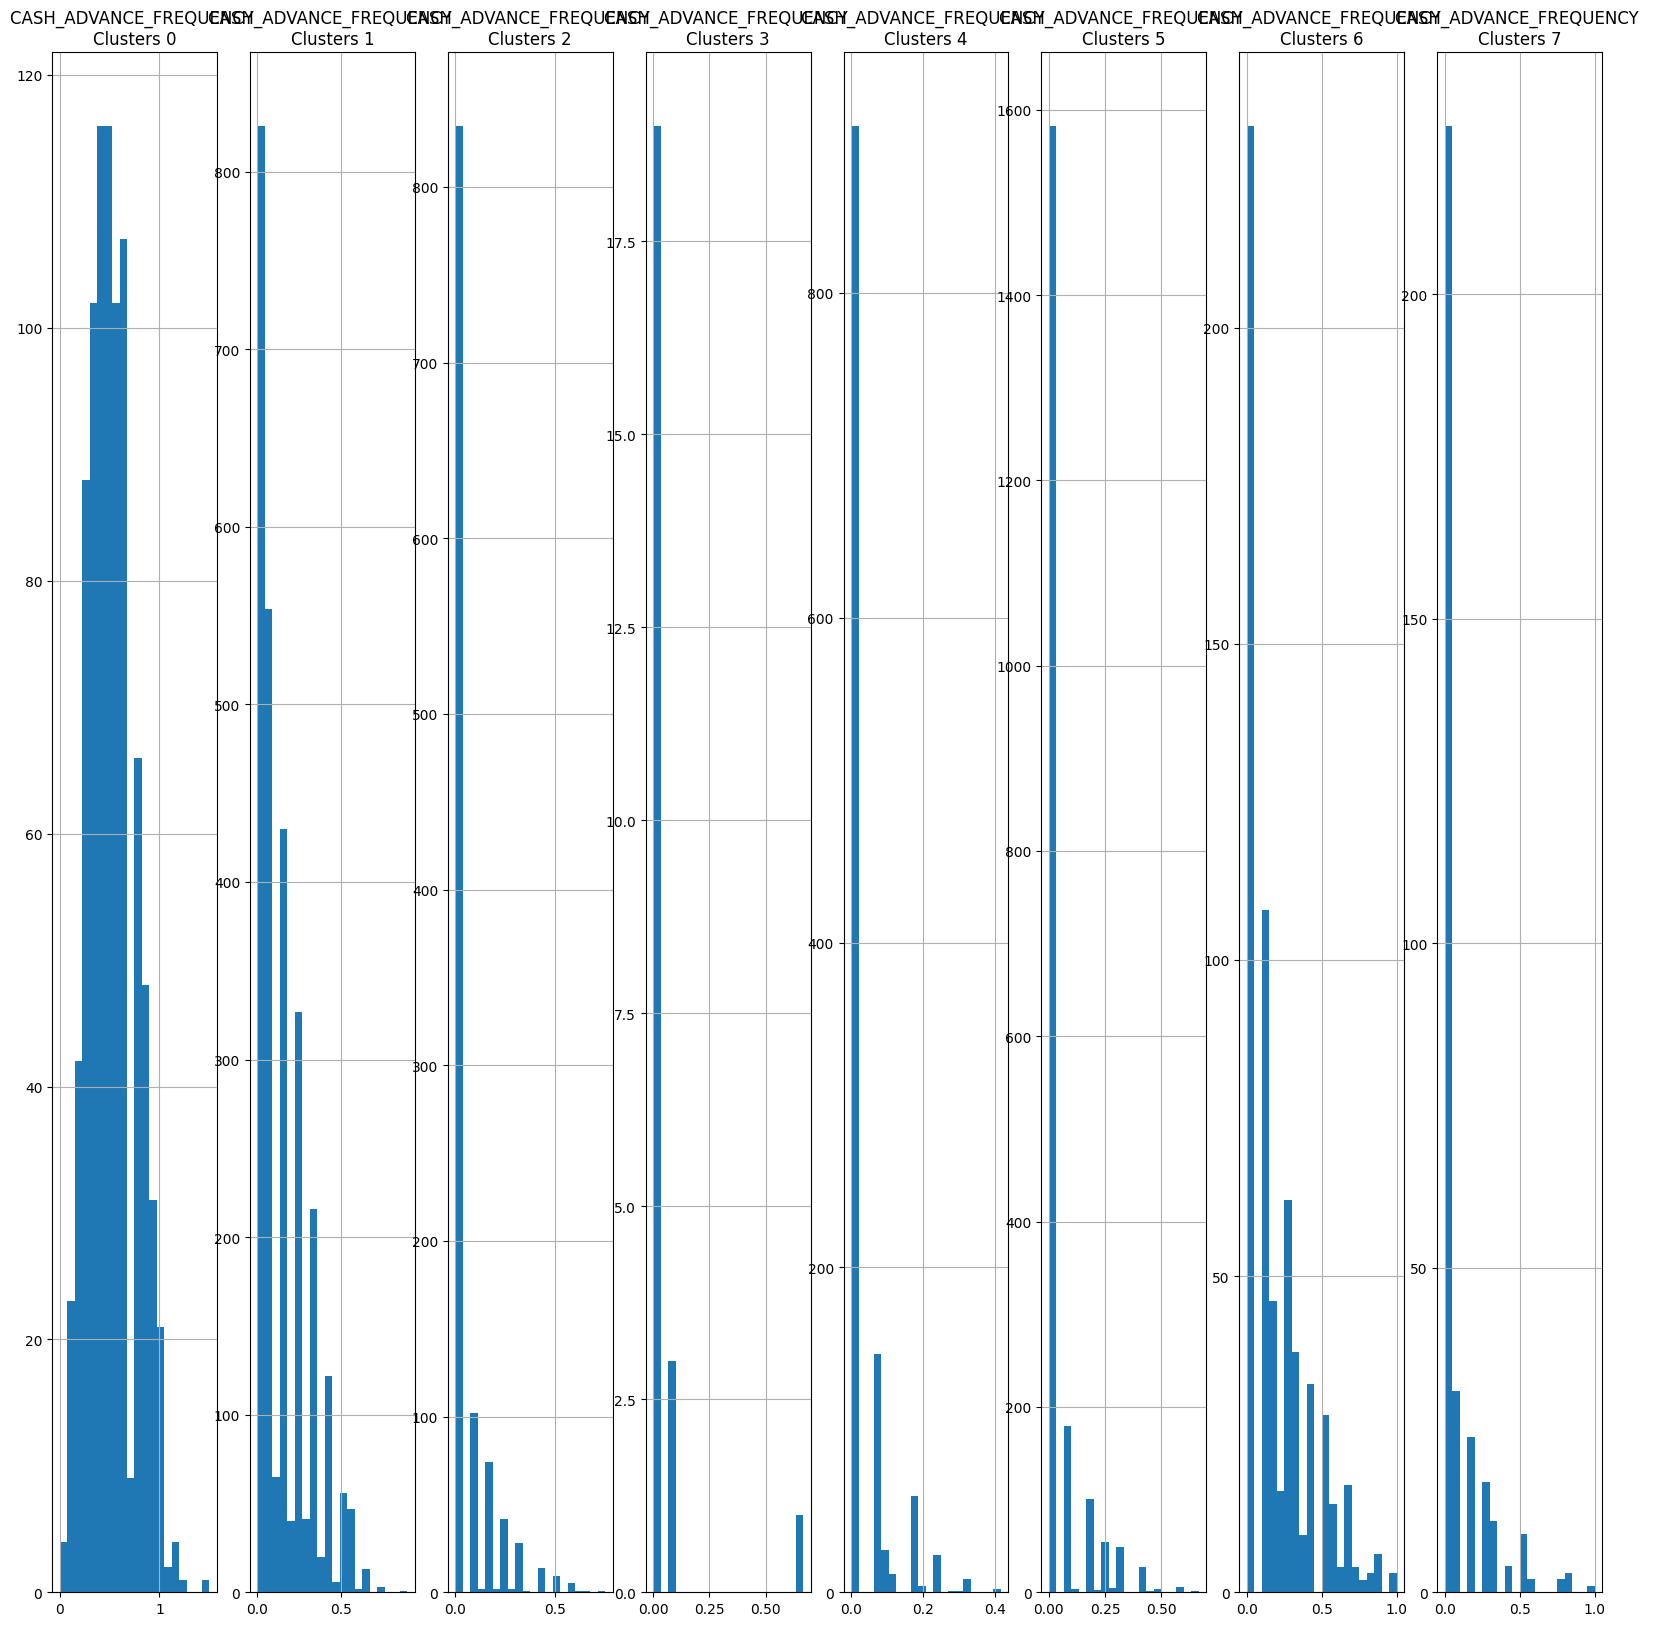

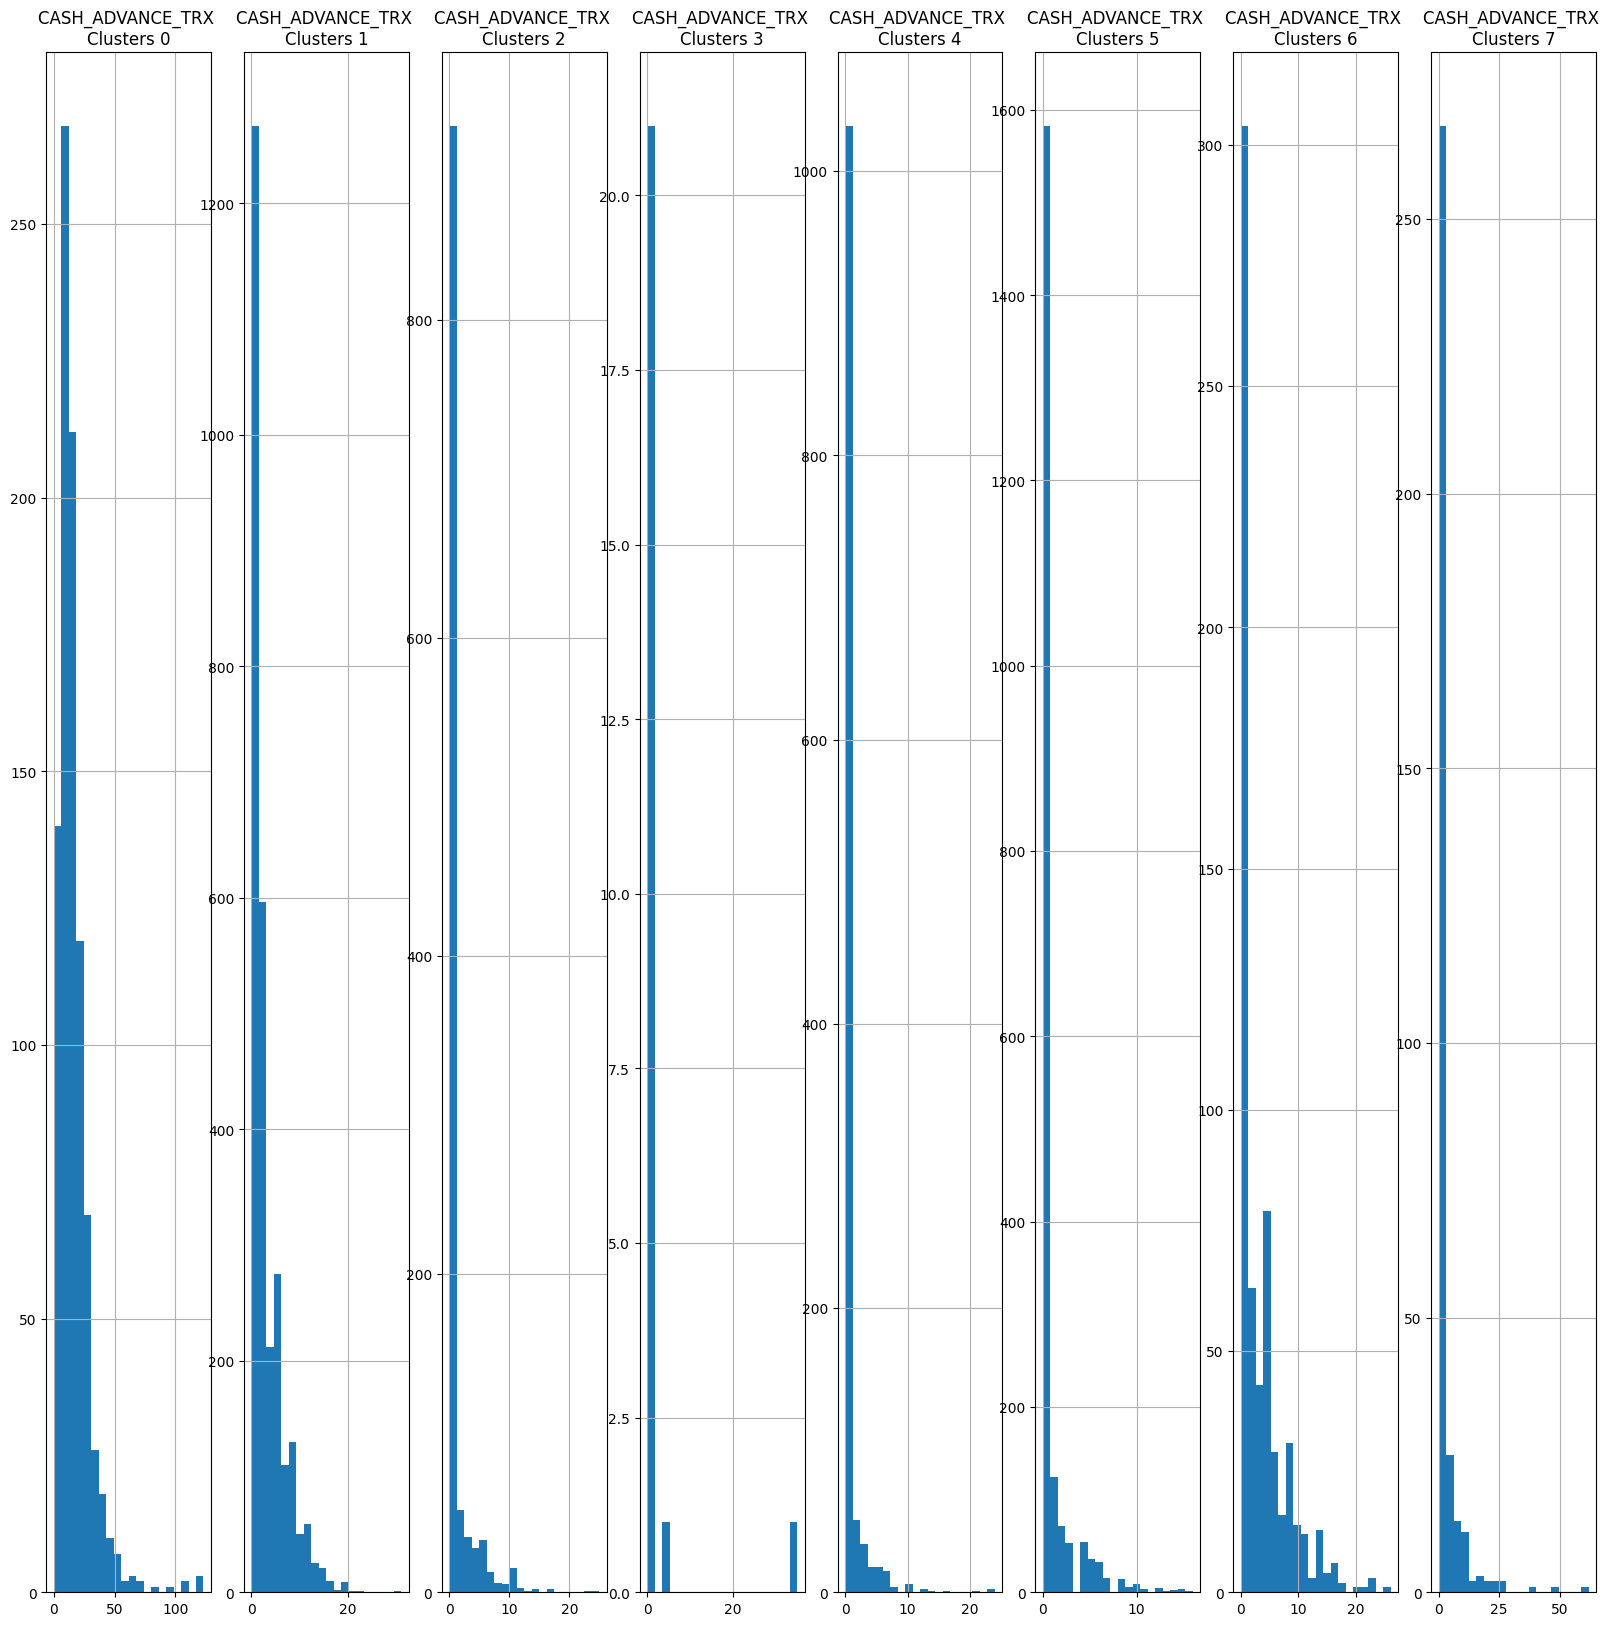

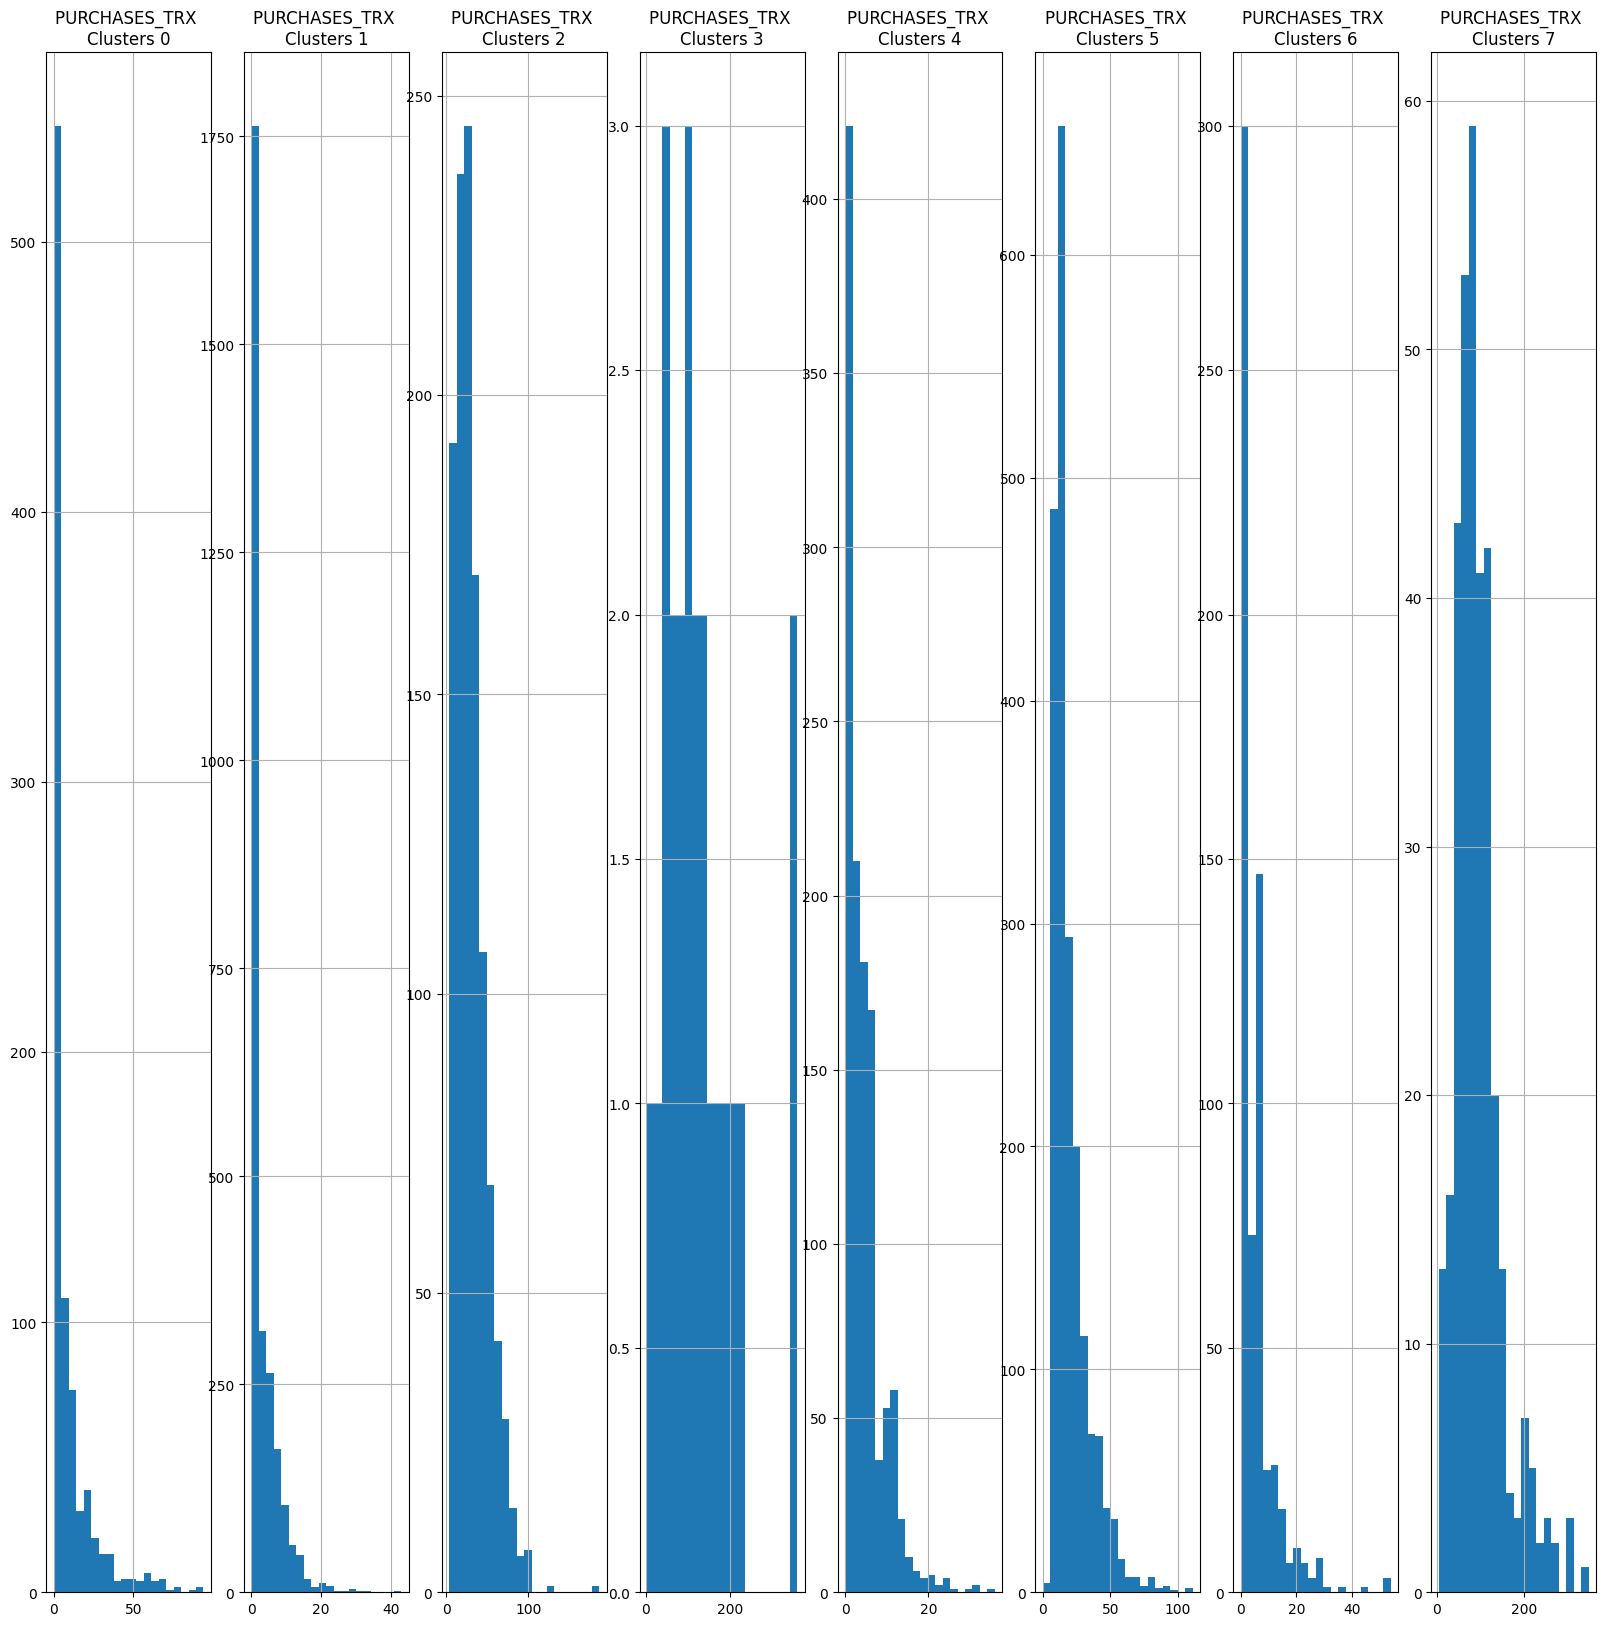

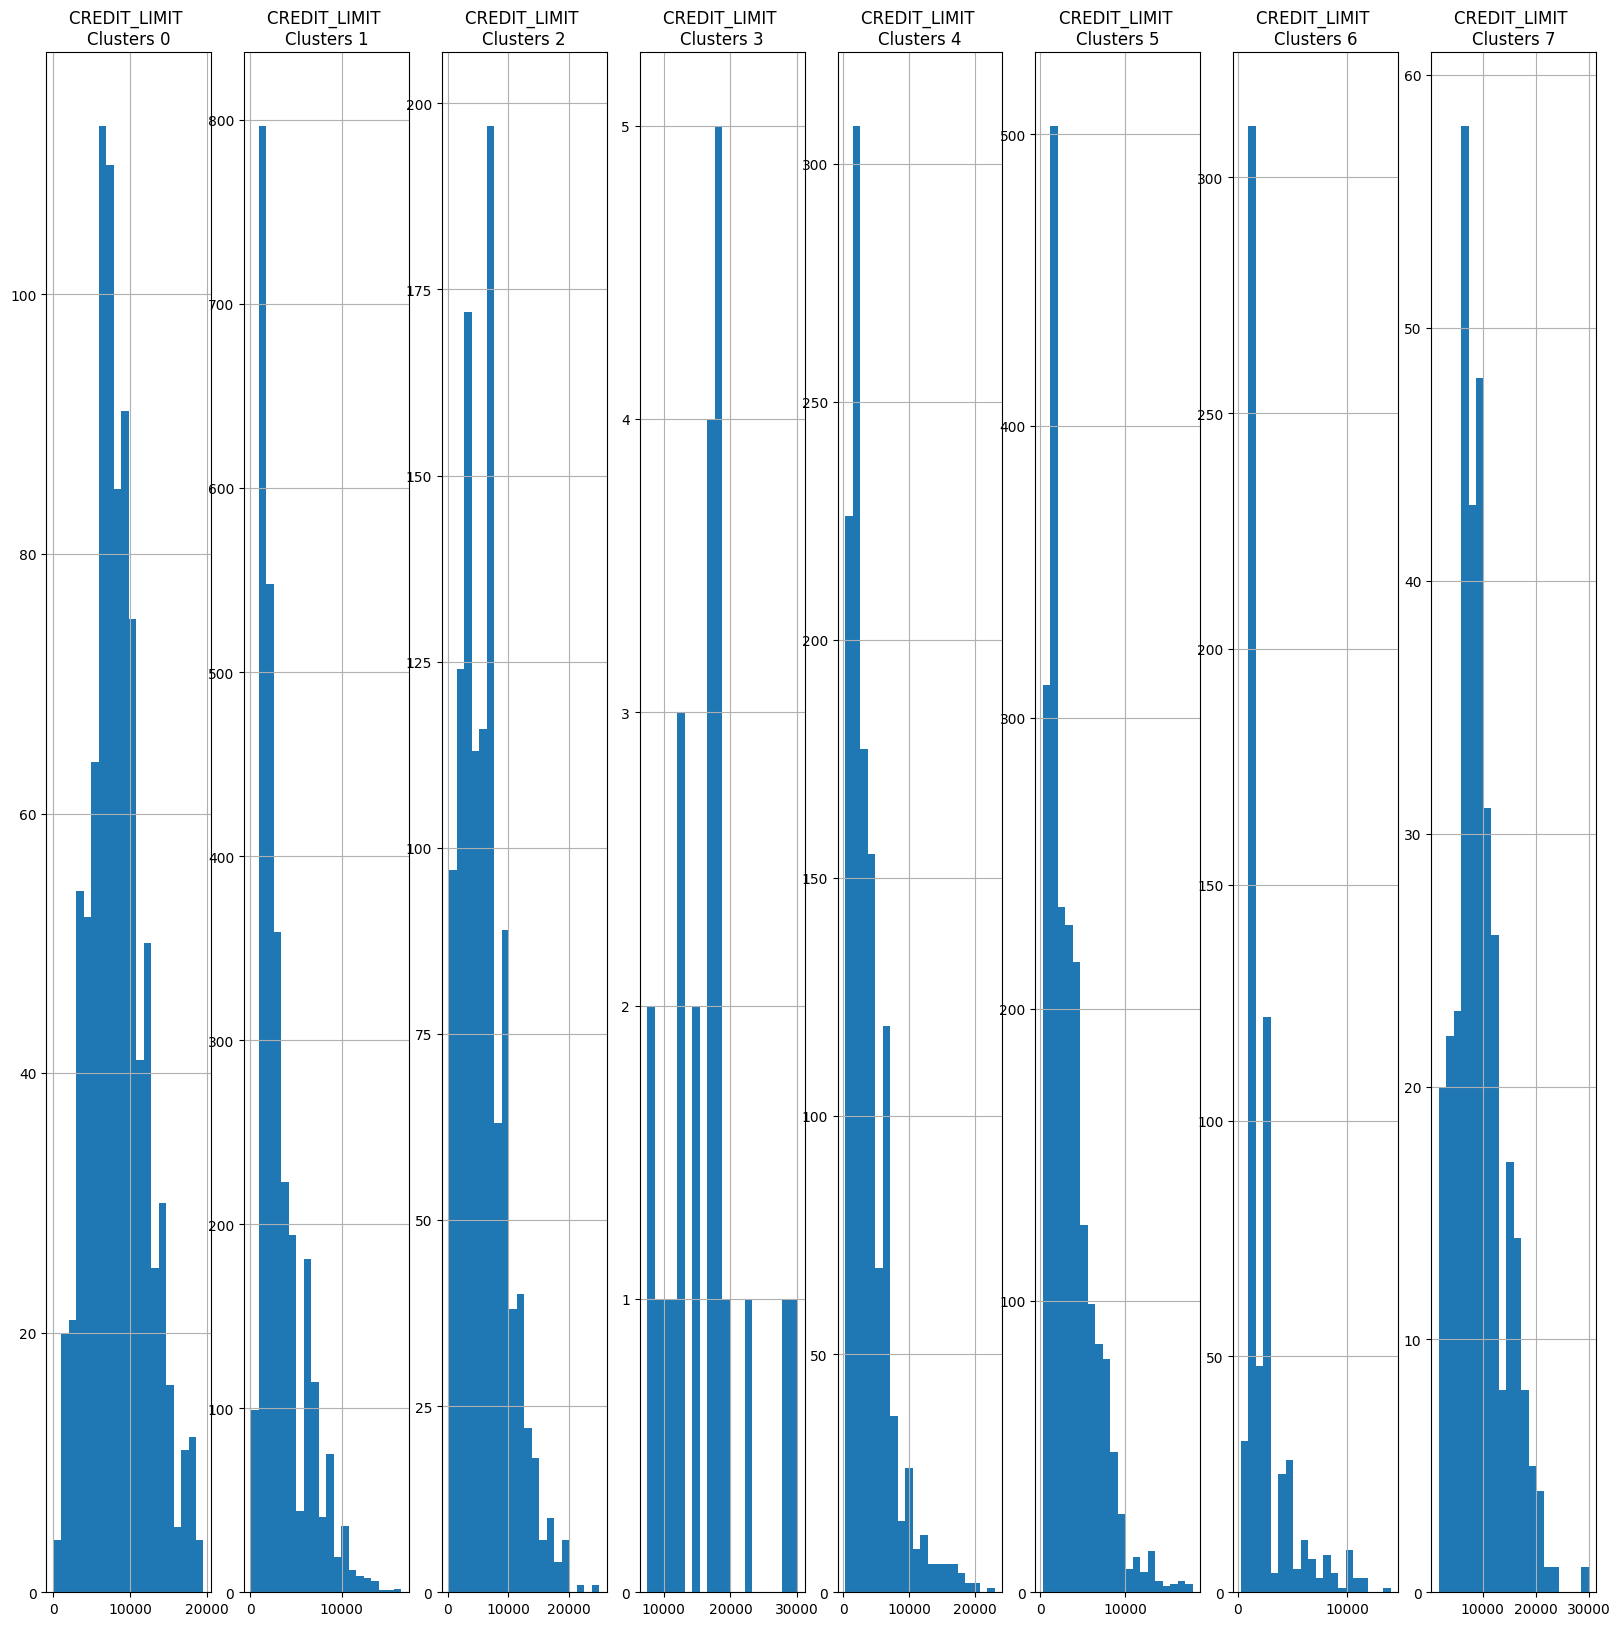

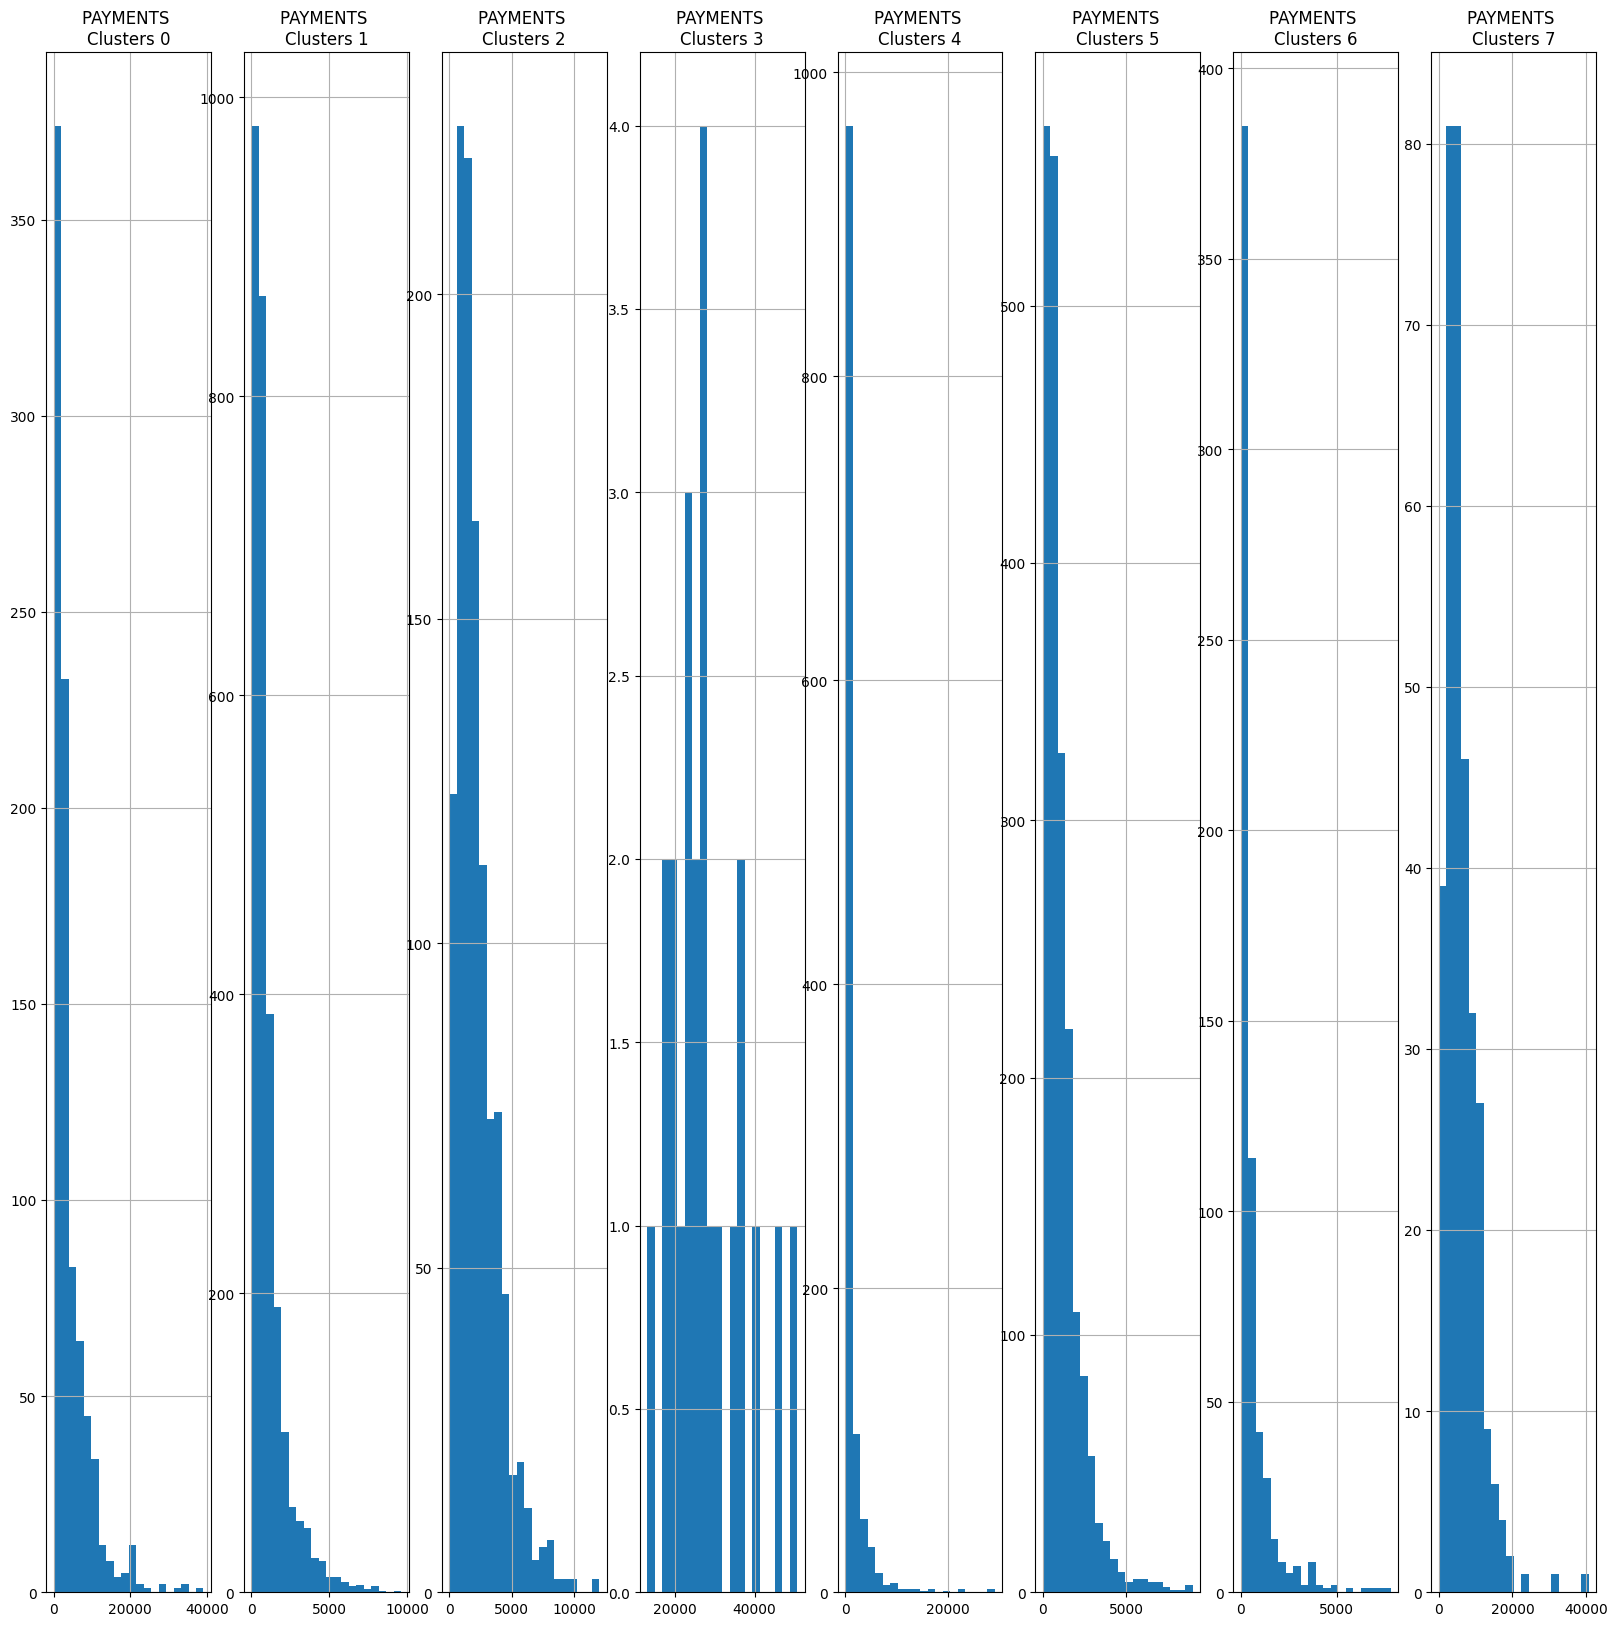

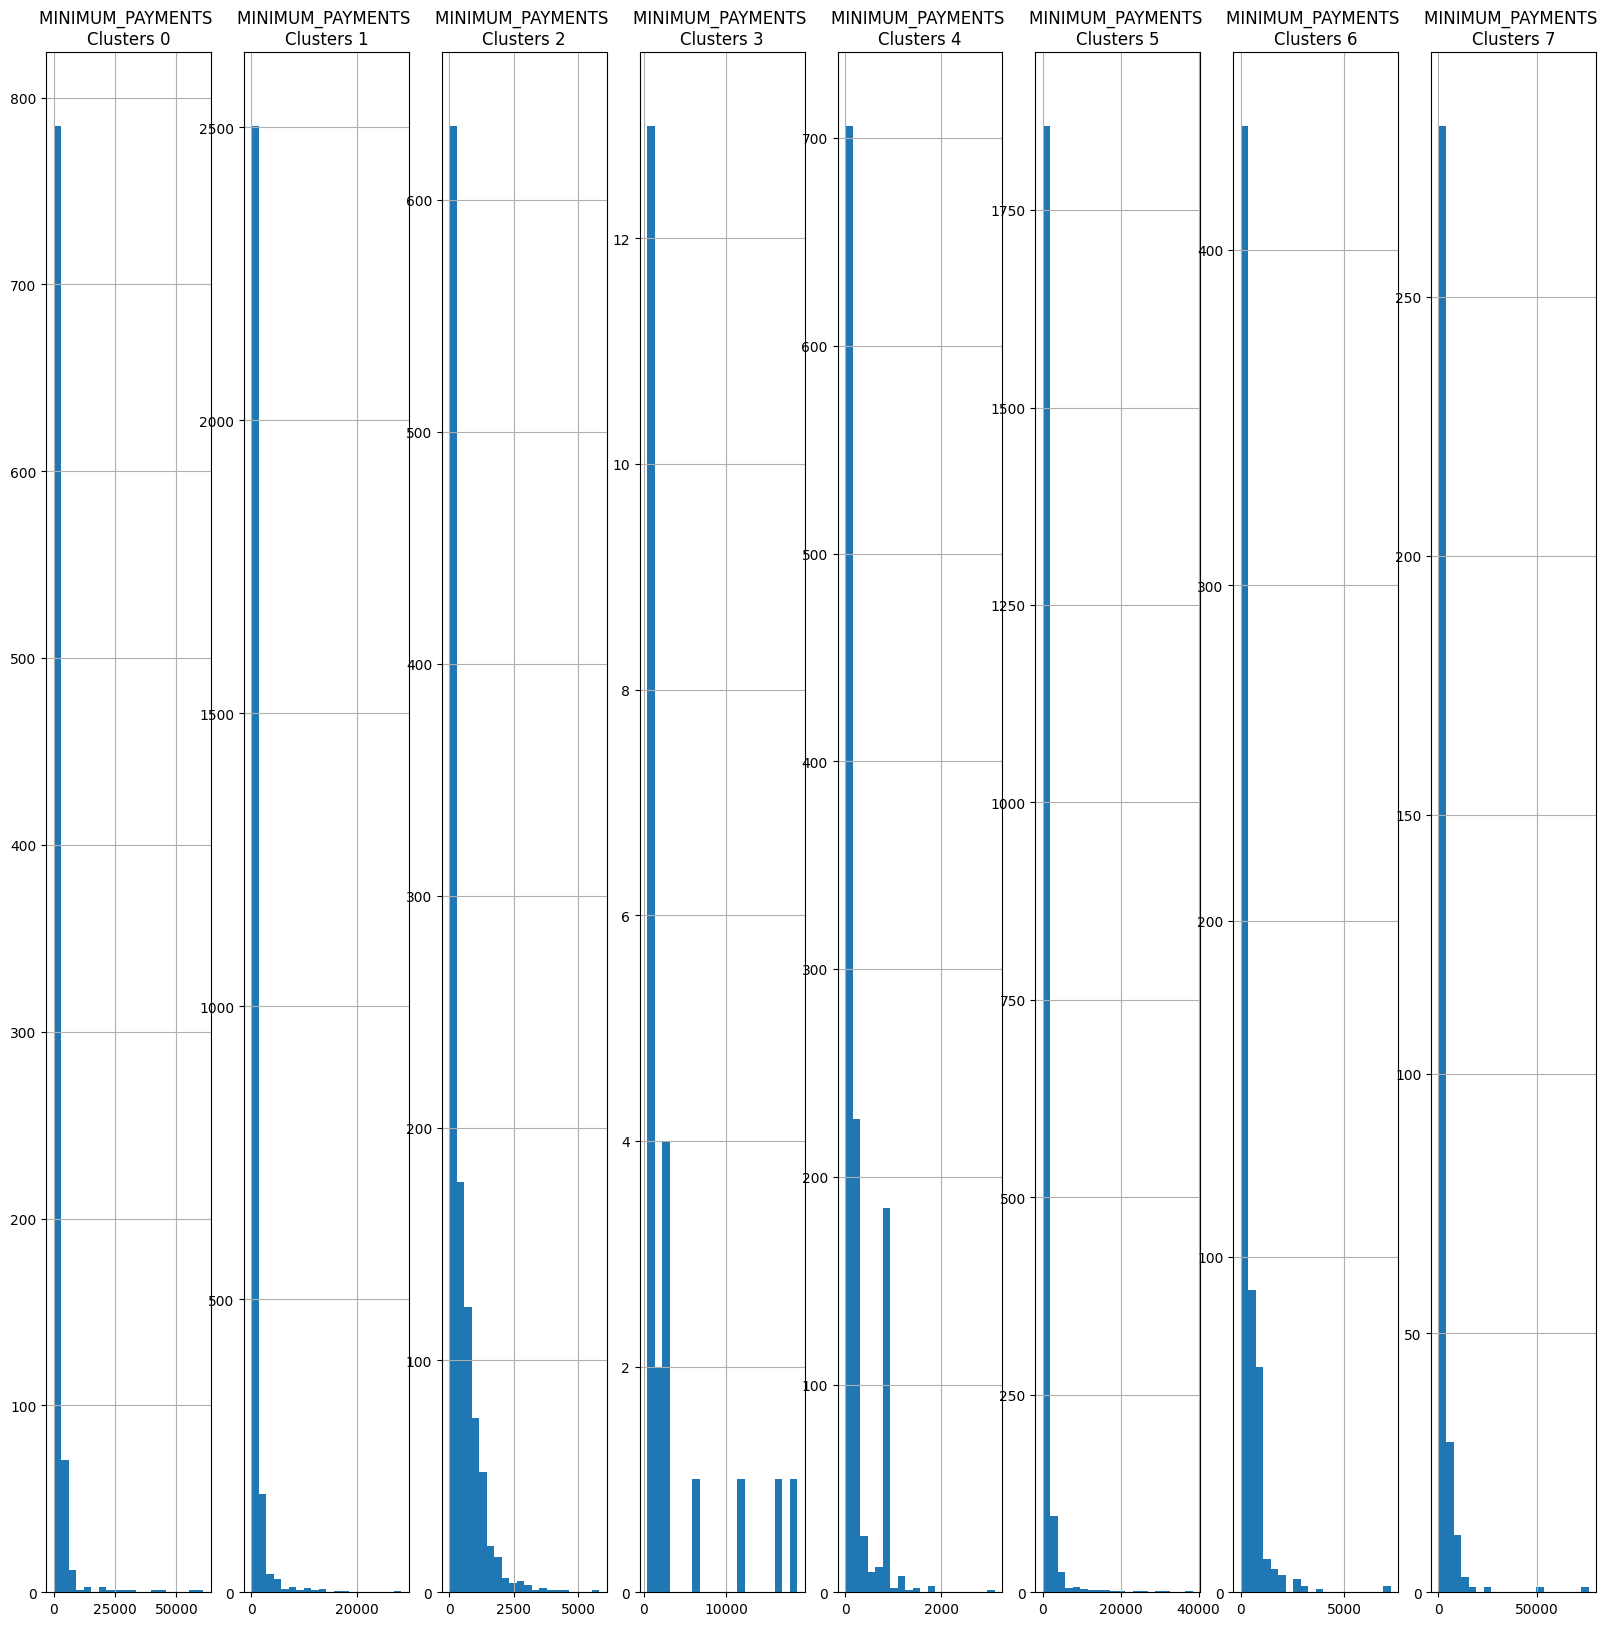

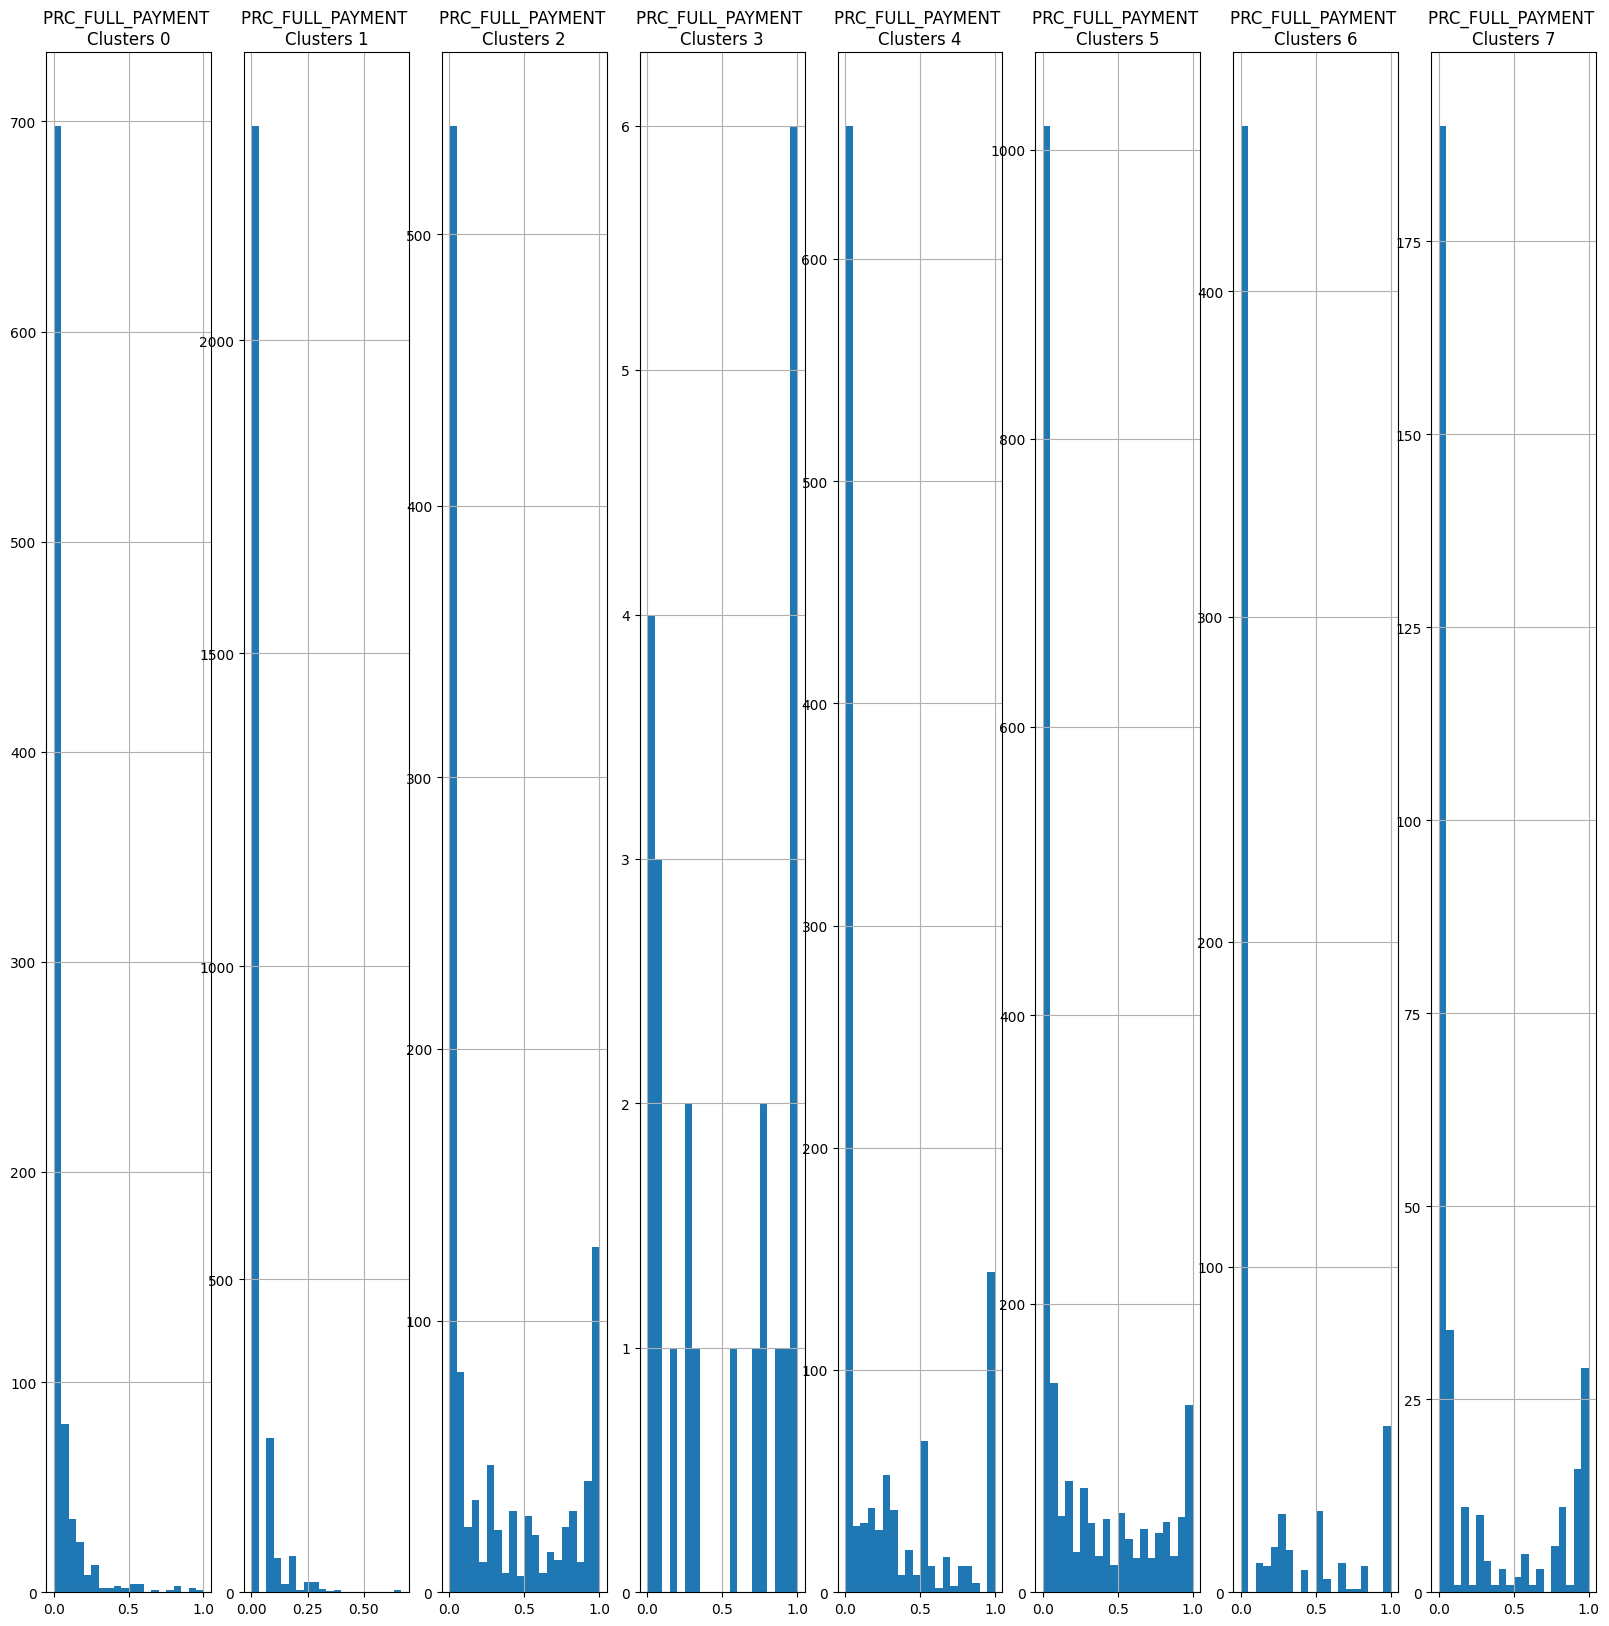

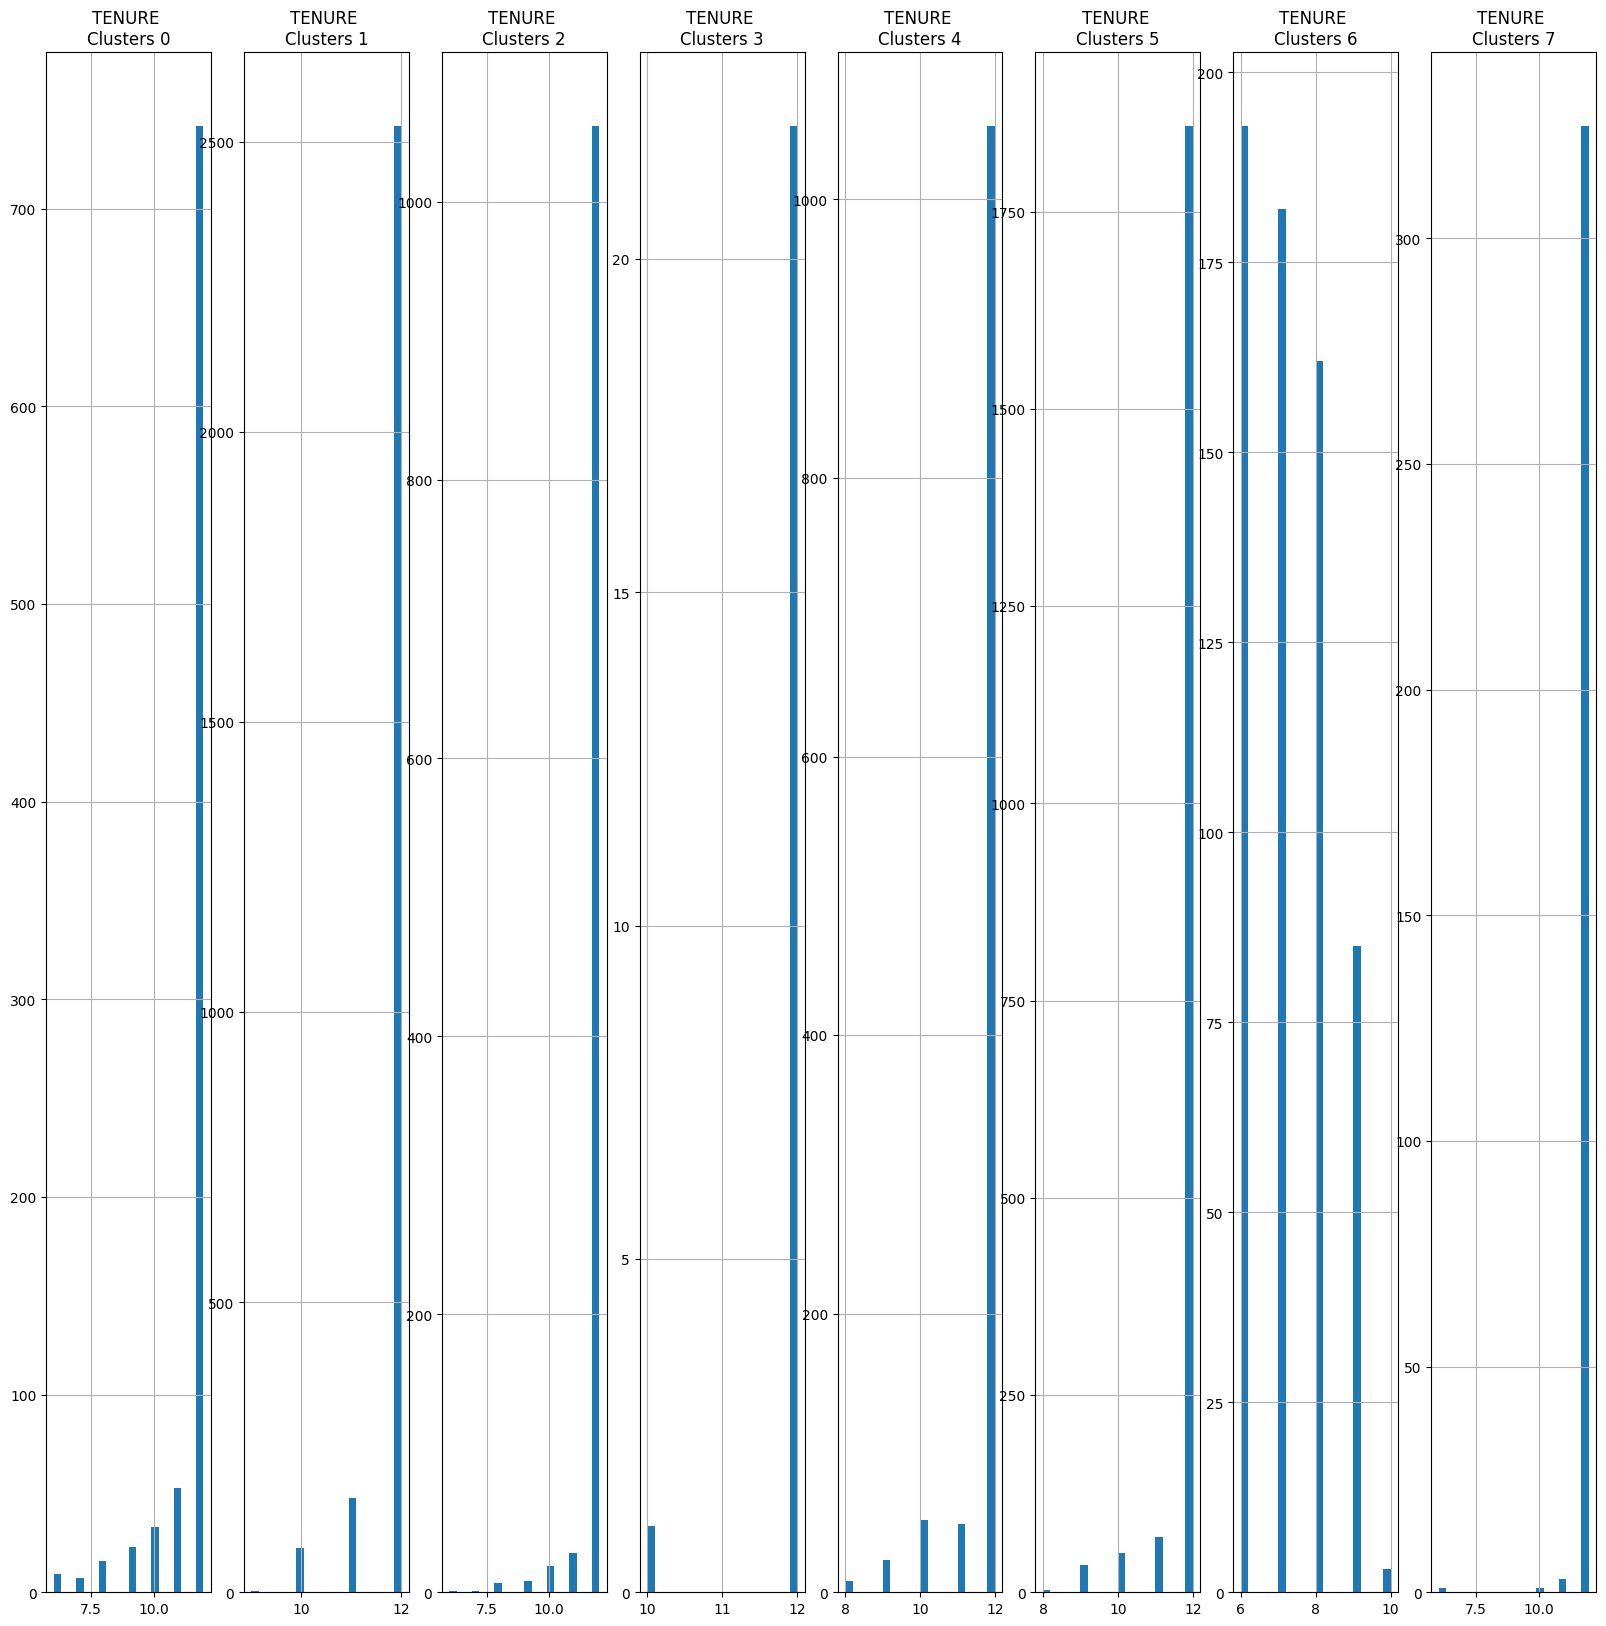

In [ ]:
# Plotting histogram of different clusters
for i in credit_df.columns:
    plt.figure(figsize=(20,20))
    for j in range(8):
        plt.subplot(1,8,j+1)
        clusters = credit_df_clusters[credit_df_clusters['clusters']==j]
        clusters[i].hist(bins=20)
        plt.title(f'{i} \nClusters {j}')

plt.show()

In [ ]:
# Pricipal Component Ananlysis
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(credit_df_scaled)

pca_df = pd.DataFrame(data=principal_comp, columns=['pca1','pca2'])

pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df

,pca1,pca2,cluster
0,-1.682219,-1.076445,1
1,-1.138299,2.506496,0
2,0.969717,-0.383458,2
3,-0.873636,0.043158,1
4,-1.599431,-0.688575,1
...,...,...,...
8945,-0.359630,-2.016157,6
8946,-0.564358,-1.639111,6
8947,-0.926203,-1.810792,6
8948,-2.336554,-0.657979,6


<ipython-input-32-d1eb8e9549f6>:2: UserWarning: 
The palette list has fewer values (7) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_df, palette=['red','blue', 'green', 'pink','yellow','gray','black'])


<Axes: xlabel='pca1', ylabel='pca2'>

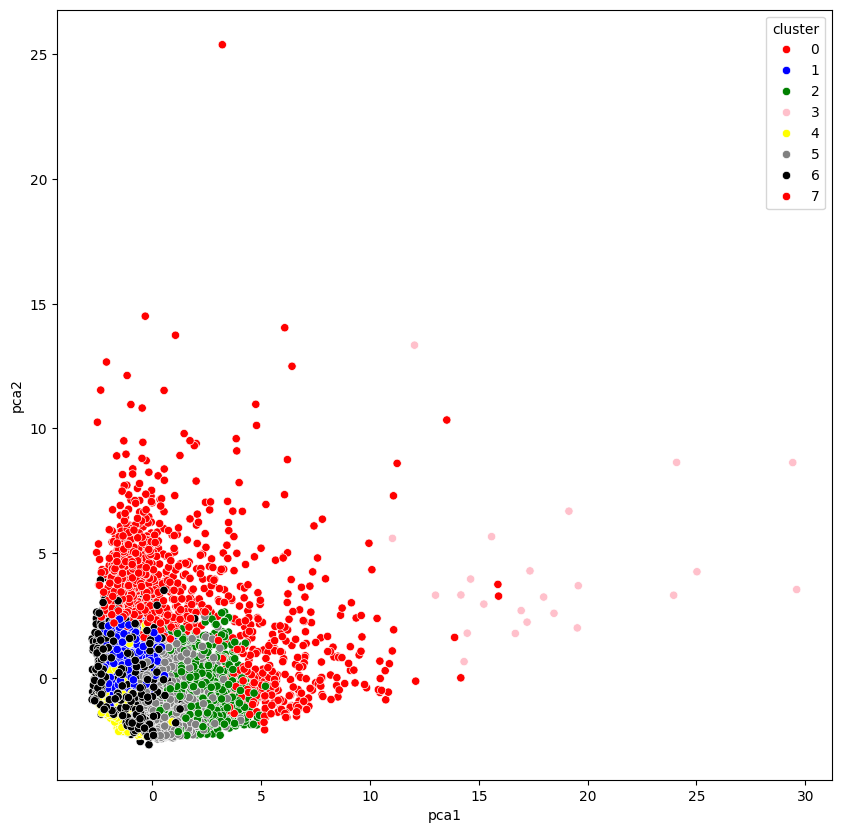

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_df, palette=['red','blue', 'green', 'pink','yellow','gray','black'])


In [ ]:
# Applying Autoencoders for dimensionality reduction
from tensorflow.keras.layers import Input, Dense, Add, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [ ]:
input_df = Input(shape=(17,))

x = Dense(7, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)
encoded= Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)
x= Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)

decoded = Dense(17, kernel_initializer='glorot_uniform')(x)

# Autoencoder
autoencoder = Model(input_df, decoded)
# Encoder
encoder = Model(input_df, encoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
credit_df_scaled.shape

(8950, 17)

In [ ]:
from re import VERBOSE
autoencoder.fit(credit_df_scaled, credit_df_scaled, epochs=25, batch_size=128, verbose=1)

Epoch 1/25
70/70 [==============================] - 6s 64ms/step - loss: 0.5748
Epoch 2/25
70/70 [==============================] - 5s 78ms/step - loss: 0.3420
Epoch 3/25
70/70 [==============================] - 9s 124ms/step - loss: 0.2472
Epoch 4/25
70/70 [==============================] - 10s 141ms/step - loss: 0.2115
Epoch 5/25
70/70 [==============================] - 4s 63ms/step - loss: 0.1806
Epoch 6/25
70/70 [==============================] - 5s 68ms/step - loss: 0.1545
Epoch 7/25
70/70 [==============================] - 6s 81ms/step - loss: 0.1419
Epoch 8/25
70/70 [==============================] - 4s 63ms/step - loss: 0.1271
Epoch 9/25
70/70 [==============================] - 5s 70ms/step - loss: 0.1259
Epoch 10/25
70/70 [==============================] - 6s 80ms/step - loss: 0.1266
Epoch 11/25
70/70 [==============================] - 4s 64ms/step - loss: 0.1033
Epoch 12/25
70/70 [==============================] - 5s 73ms/step - loss: 0.0975
Epoch 13/25
70/70 [===============

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [ ]:
# Applying KMeans to encoded version
encoded_df_pred = encoder.predict(credit_df_scaled)

280/280 [==============================] - 3s 10ms/step


In [ ]:
encoded_df_pred.shape

(8950, 10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

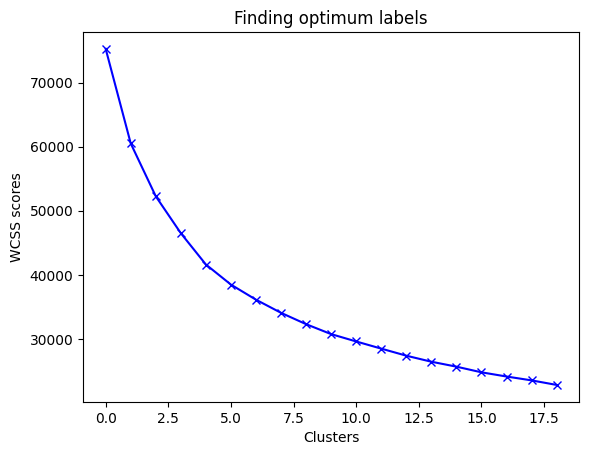

In [ ]:
score_2=[]
range_values = range(1,20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_transform(encoded_df_pred)
    score_2.append(kmeans.inertia_)
plt.plot(score_2, 'bx-')
plt.title('Finding optimum labels')
plt.xlabel('Clusters')
plt.ylabel('WCSS scores')
plt.show()


<ipython-input-42-fbca704a2708>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(score_1, 'bx-', color='r')
<ipython-input-42-fbca704a2708>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(score_2, 'bx-', color= 'g')


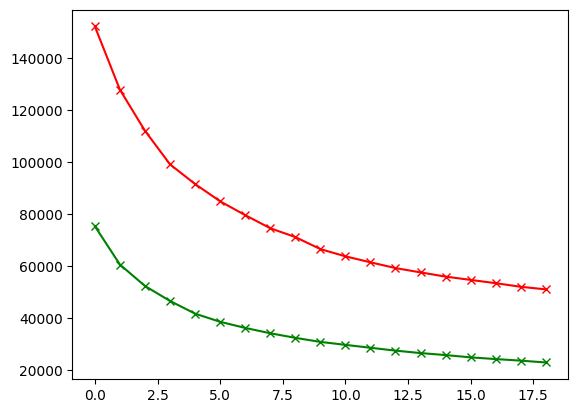

In [ ]:
plt.plot(score_1, 'bx-', color='r')
plt.plot(score_2, 'bx-', color= 'g')

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(encoded_df_pred)
labels= kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df_clusters = pd.concat([credit_df, pd.DataFrame({'clusters': labels})], axis=1)
df_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [ ]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(encoded_df_pred)

pca_df = pd.DataFrame(data=principal_comp, columns=['pca1','pca2'])

pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df

,pca1,pca2,cluster
0,-1.367768,-0.181259,2
1,2.278303,-1.741227,0
2,-0.819674,0.709982,2
3,0.558380,-0.766751,3
4,-1.163142,-0.151442,2
...,...,...,...
8945,0.027609,0.894273,3
8946,-0.672957,0.048257,3
8947,0.021499,0.501787,3
8948,1.040160,-1.183384,3


<Axes: xlabel='pca1', ylabel='pca2'>

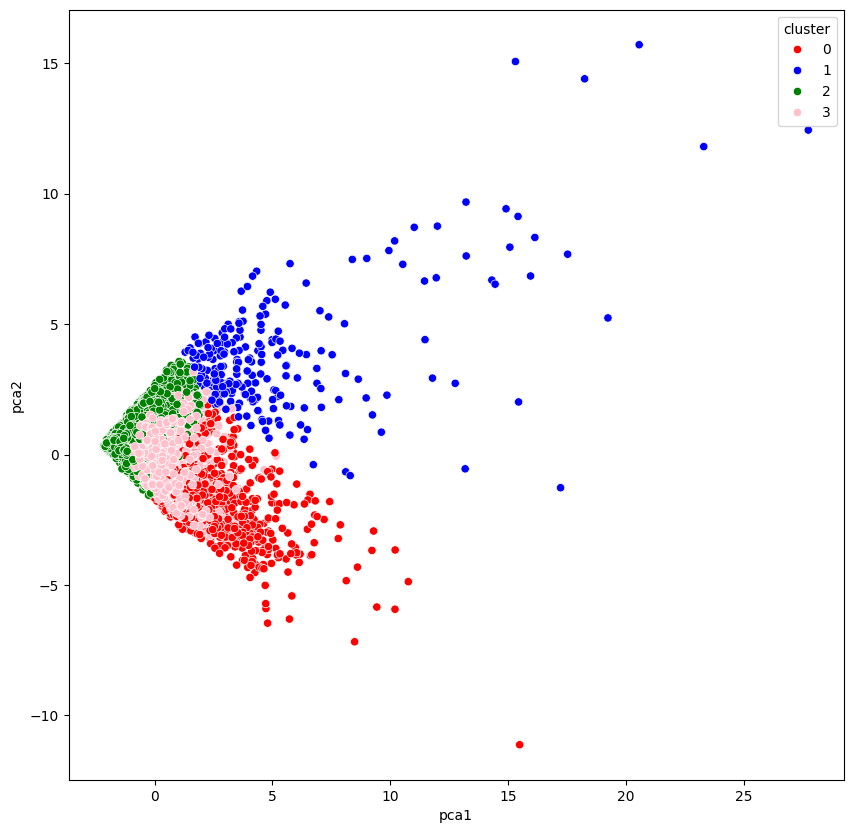

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_df, palette=['red','blue', 'green', 'pink'])